In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#sp500_stocks.csv
import pandas as pd
df = pd.read_csv('sp500_stocks.csv')
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...,...
1812215,2024-05-01,ZTS,158.500000,158.500000,160.779999,158.039993,158.169998,3779100.0
1812216,2024-05-02,ZTS,167.229996,167.229996,169.990005,161.380005,163.100006,5323100.0
1812217,2024-05-03,ZTS,167.070007,167.070007,171.690002,166.949997,170.449997,3007000.0
1812218,2024-05-06,ZTS,165.949997,165.949997,167.619995,164.880005,167.350006,3081300.0


In [ ]:
df.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

In [ ]:
df['Symbol'].unique()

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP',
       'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI',
       'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM',
       'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB',
       'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX',
       'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG',
       'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR',
       'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
       'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC',
       'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB',
       'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME',
       'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED',
  

In [ ]:
ebay_data = df[df['Symbol'] == 'EBAY']

In [ ]:
ebay_data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
588430,2010-01-04,EBAY,9.216119,10.058923,10.092593,9.941077,9.983165,22511650.0
588431,2010-01-05,EBAY,9.119714,9.953704,10.058923,9.890572,10.012626,26683193.0
588432,2010-01-06,EBAY,9.061874,9.890572,10.016835,9.865320,9.945286,26368610.0
588433,2010-01-07,EBAY,8.957759,9.776936,9.886364,9.751684,9.886364,25220052.0
588434,2010-01-08,EBAY,9.065732,9.894781,9.949495,9.722222,9.760101,30484080.0
...,...,...,...,...,...,...,...,...
592035,2024-05-01,EBAY,51.060001,51.060001,52.490002,51.040001,51.689999,8328800.0
592036,2024-05-02,EBAY,49.389999,49.389999,50.860001,48.520000,49.320000,10828800.0
592037,2024-05-03,EBAY,49.650002,49.650002,50.259998,49.369999,49.599998,6896500.0
592038,2024-05-06,EBAY,49.380001,49.380001,50.160000,49.250000,49.810001,5811200.0


In [ ]:
IBM_data = df[df['Symbol'] == 'IBM']

In [ ]:
IBM_data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
884450,2010-01-04,IBM,81.378662,126.625237,127.122368,125.095604,125.411087,6438444.0
884451,2010-01-05,IBM,80.395607,125.095604,126.051628,124.378586,125.889099,7156104.0
884452,2010-01-06,IBM,79.873352,124.282982,125.707458,124.101341,124.933075,5863144.0
884453,2010-01-07,IBM,79.596886,123.852776,124.521988,123.240921,124.158699,6109268.0
884454,2010-01-08,IBM,80.395607,125.095604,125.162521,123.374763,123.393883,4390271.0
...,...,...,...,...,...,...,...,...
888055,2024-05-01,IBM,164.429993,164.429993,166.270004,164.300003,165.690002,4029900.0
888056,2024-05-02,IBM,164.690002,164.690002,164.880005,162.619995,164.350006,3829900.0
888057,2024-05-03,IBM,165.710007,165.710007,166.610001,164.919998,165.000000,3400400.0
888058,2024-05-06,IBM,168.610001,168.610001,168.669998,166.380005,166.500000,4222300.0


In [ ]:
ebay_data.to_csv('ebaydata.csv', index=False)

NameError: name 'ebay_data' is not defined

In [ ]:
df = pd.read_csv('ebaydata.csv')
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,EBAY,9.216119,10.058923,10.092593,9.941077,9.983165,22511650.0
1,2010-01-05,EBAY,9.119714,9.953704,10.058923,9.890572,10.012626,26683193.0
2,2010-01-06,EBAY,9.061874,9.890572,10.016835,9.865320,9.945286,26368610.0
3,2010-01-07,EBAY,8.957759,9.776936,9.886364,9.751684,9.886364,25220052.0
4,2010-01-08,EBAY,9.065732,9.894781,9.949495,9.722222,9.760101,30484080.0
...,...,...,...,...,...,...,...,...
3605,2024-05-01,EBAY,51.060001,51.060001,52.490002,51.040001,51.689999,8328800.0
3606,2024-05-02,EBAY,49.389999,49.389999,50.860001,48.520000,49.320000,10828800.0
3607,2024-05-03,EBAY,49.650002,49.650002,50.259998,49.369999,49.599998,6896500.0
3608,2024-05-06,EBAY,49.380001,49.380001,50.160000,49.250000,49.810001,5811200.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.set_index('Date', inplace=True)


In [ ]:
df.drop(columns=['Symbol'], inplace=True)


In [ ]:
#df.drop(columns=['Symbol'], inplace=True)

# Convert 'Date' column to datetime format
#f['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
#df.set_index('Date', inplace=True)

# Resample the data to monthly frequency and aggregate using mean
monthly_data = df.resample('M').mean()  # Use 'M' for month end frequency

# Reset the index if you want 'Date' to be a column again
monthly_data.reset_index(inplace=True)

# Display the first few rows of the monthly data
print(monthly_data.head())

        Date  Adj Close      Close       High        Low       Open  \
0 2010-01-31   9.024531   9.849814  10.014399   9.721336   9.889243   
1 2010-02-28   8.773072   9.575359   9.667065   9.436913   9.559631   
2 2010-03-31  10.047196  10.966001  11.075611  10.808081  10.888962   
3 2010-04-30   9.977610  10.890051  11.000281  10.760382  10.902076   
4 2010-05-31   8.517197   9.296086   9.477483   9.123317   9.333965   

         Volume  
0  4.794064e+07  
1  3.268951e+07  
2  3.770346e+07  
3  4.407841e+07  
4  5.162113e+07  


In [ ]:
#monthly_data = pd.read_csv('monthlydata.csv')
#monthly_data

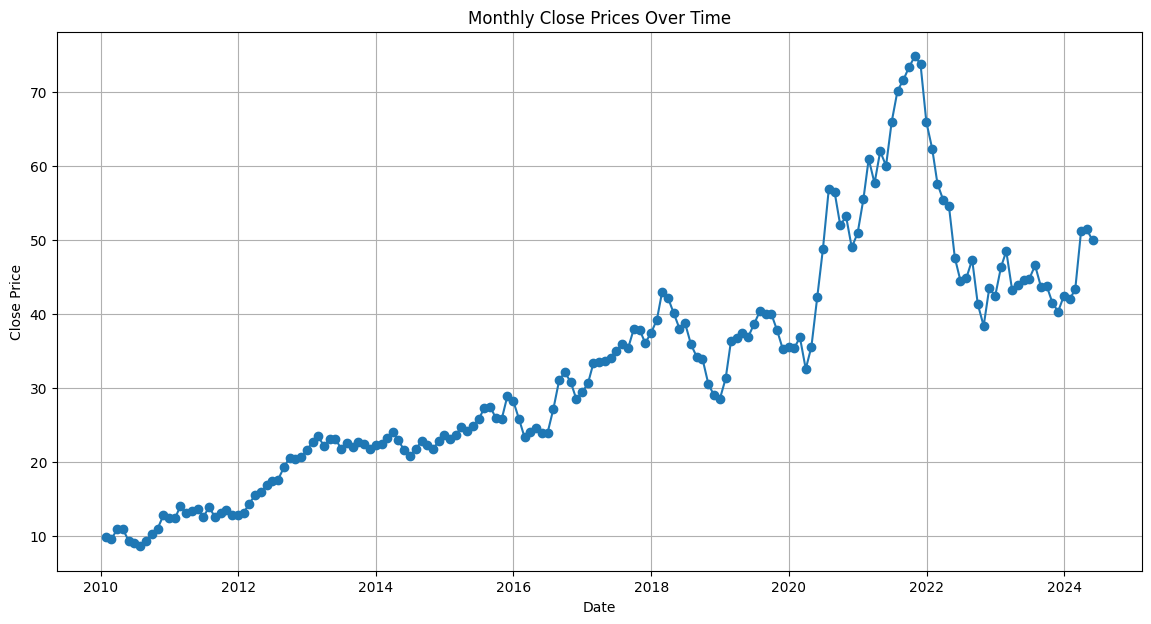

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Date'], monthly_data['Close'], marker='o', linestyle='-')
plt.title('Monthly Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [ ]:
monthly_data.to_csv('monthlydata.csv', index=False)

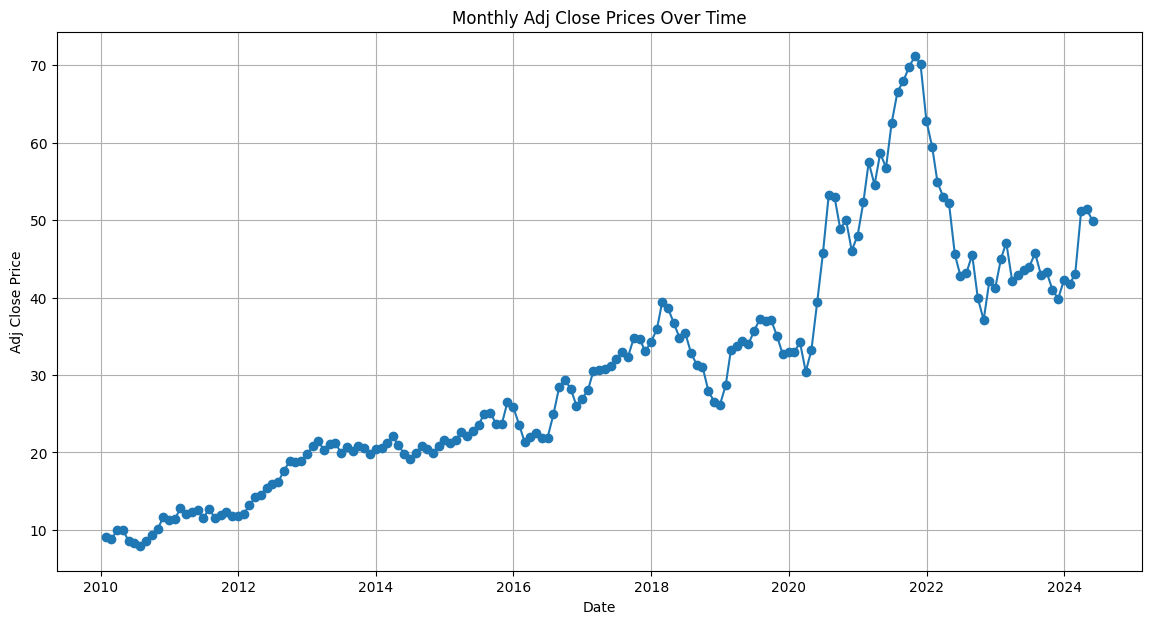

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Date'], monthly_data['Adj Close'], marker='o', linestyle='-')
plt.title('Monthly Adj Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.grid(True)
plt.show()

In [ ]:
monthly_data['NormalizedPrice'] = (monthly_data['Close'] - monthly_data['Close'].min()) / (monthly_data['Close'].max() - monthly_data['Close'].min())

In [ ]:
print("\nNormalized Price:")
print(monthly_data[['Date', 'NormalizedPrice']].head())


Normalized Price:
        Date  NormalizedPrice
0 2010-01-31         0.018622
1 2010-02-28         0.014474
2 2010-03-31         0.035493
3 2010-04-30         0.034345
4 2010-05-31         0.010253


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Calculate the p-value for the original 'Close' prices
result_before_diff = adfuller(monthly_data['Close'])
p_value_before_diff = result_before_diff[1]

In [ ]:
p_value_before_diff

0.5269489870255772

In [ ]:
monthly_data['Close_diff'] = monthly_data['Close'].diff()


In [ ]:
monthly_data.dropna(inplace=True)
result_after_diff = adfuller(monthly_data['Close_diff'])
p_value_after_diff = result_after_diff[1]

In [ ]:
p_value_after_diff

3.0201661129978292e-18

normalizedata

In [ ]:
result_before_diff = adfuller(monthly_data['NormalizedPrice'])
p_value_before_diff = result_before_diff[1]

In [ ]:
p_value_before_diff

0.5550594964004879

In [ ]:
monthly_data['normalize_diff'] = monthly_data['NormalizedPrice'].diff()


In [ ]:
monthly_data.dropna(inplace=True)
result_after_diff = adfuller(monthly_data['normalize_diff'])
p_value_after_diff = result_after_diff[1]

In [ ]:
p_value_after_diff

3.624430635934711e-18

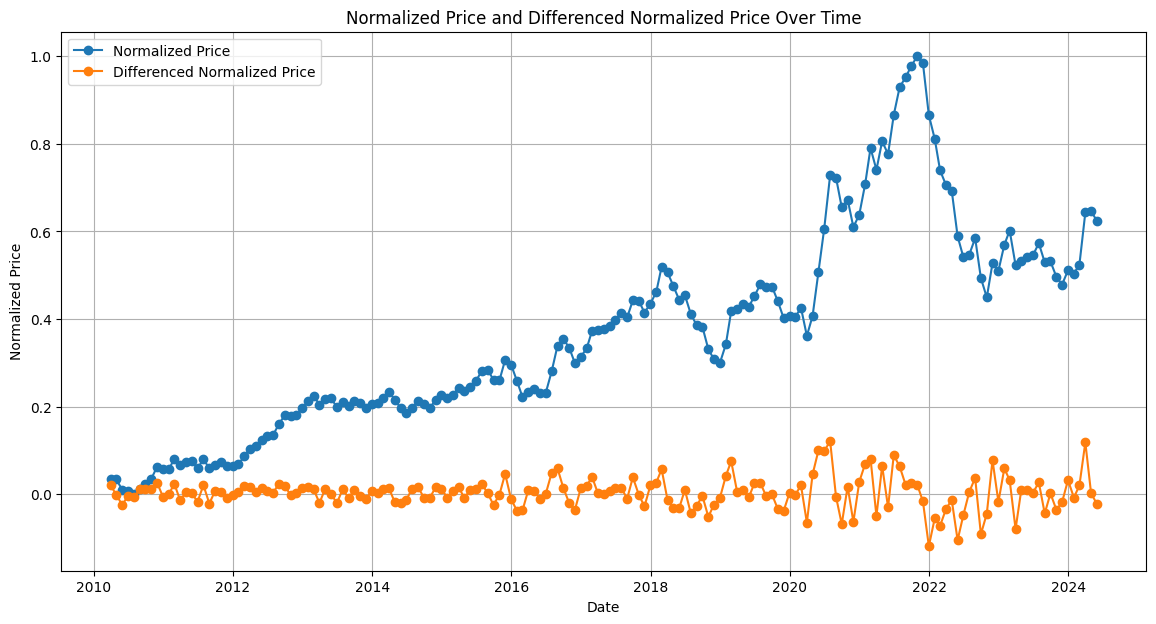

In [ ]:
# Plotting the 'NormalizedPrice' and its differenced series
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Date'], monthly_data['NormalizedPrice'], label='Normalized Price', marker='o', linestyle='-')
plt.plot(monthly_data['Date'], monthly_data['normalize_diff'], label='Differenced Normalized Price', marker='o', linestyle='-')
plt.title('Normalized Price and Differenced Normalized Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

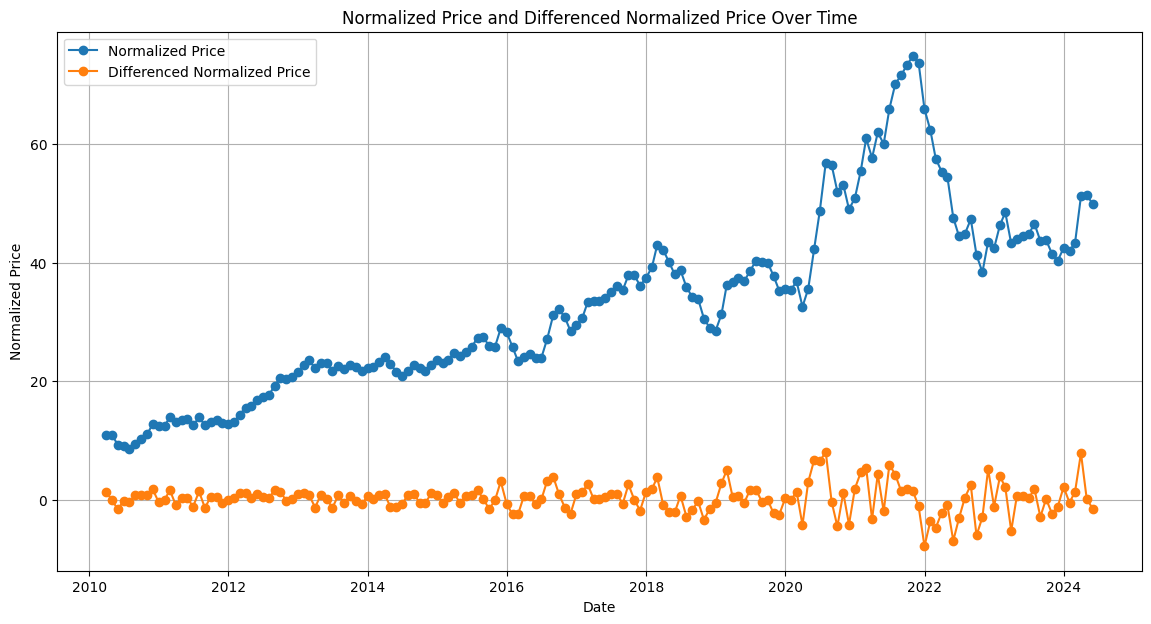

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Date'], monthly_data['Close'], label='Normalized Price', marker='o', linestyle='-')
plt.plot(monthly_data['Date'], monthly_data['Close_diff'], label='Differenced Normalized Price', marker='o', linestyle='-')
plt.title('Normalized Price and Differenced Normalized Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

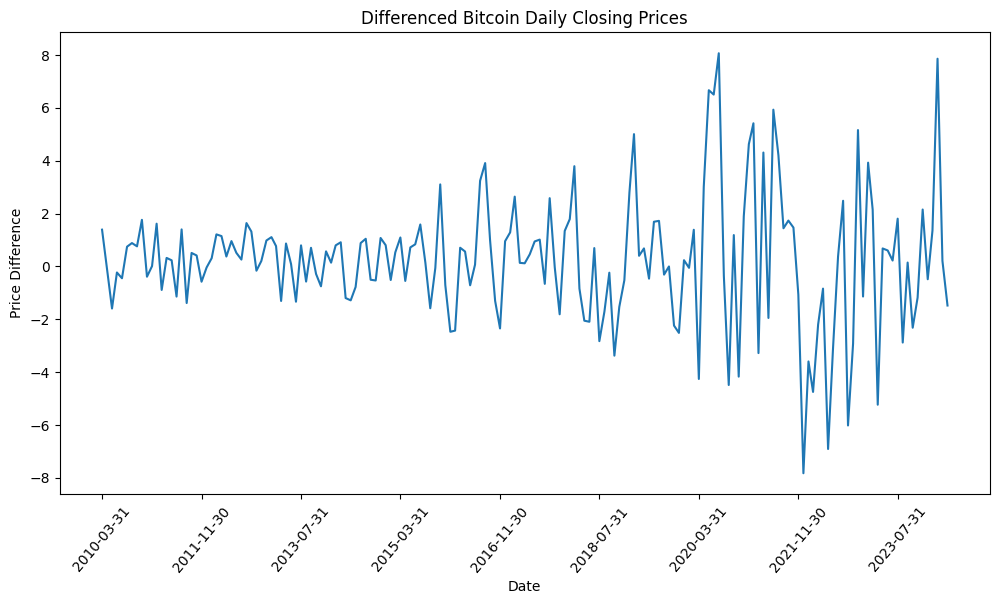

In [ ]:
# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Close_diff'])
plt.title('Differenced Bitcoin Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.xticks(monthly_data['Date'][::20], rotation=50)
plt.show()

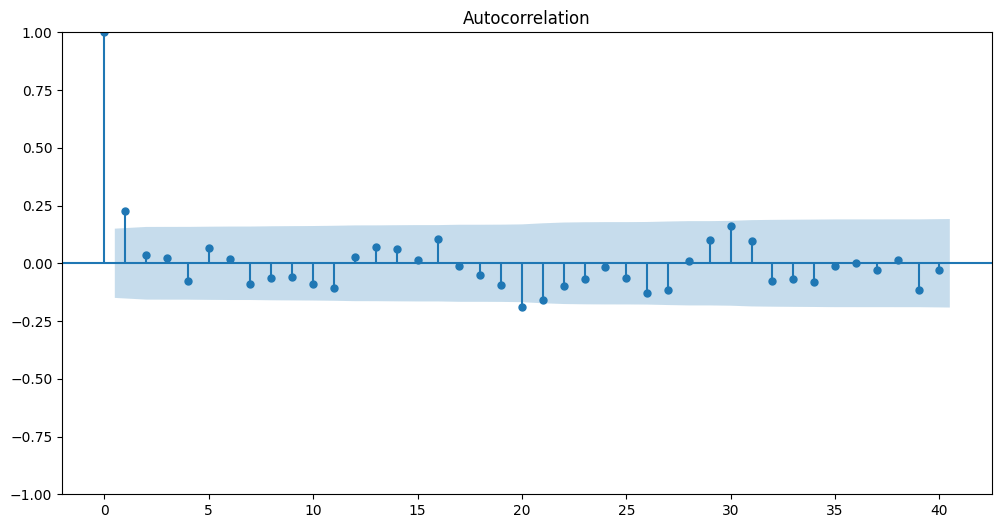

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(monthly_data['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.show()

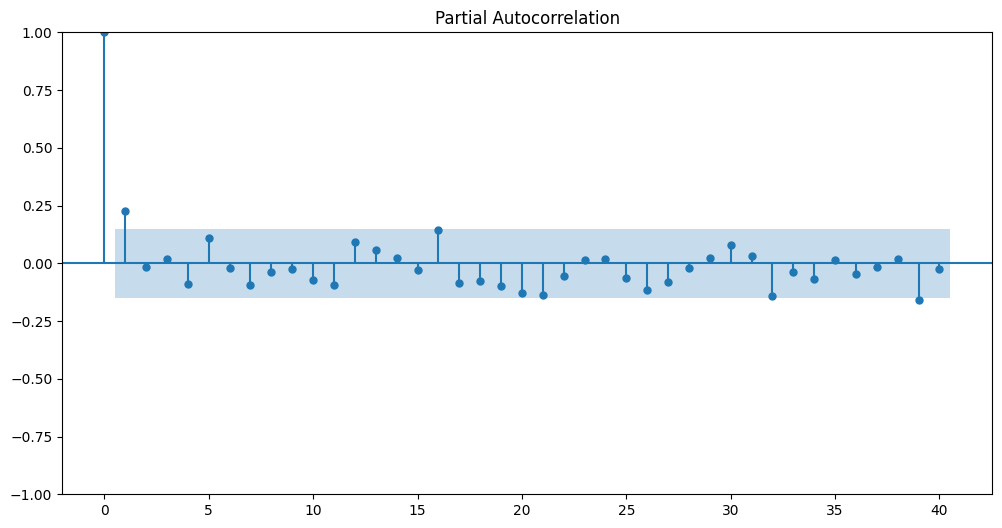

In [ ]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(monthly_data['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.show()

**ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

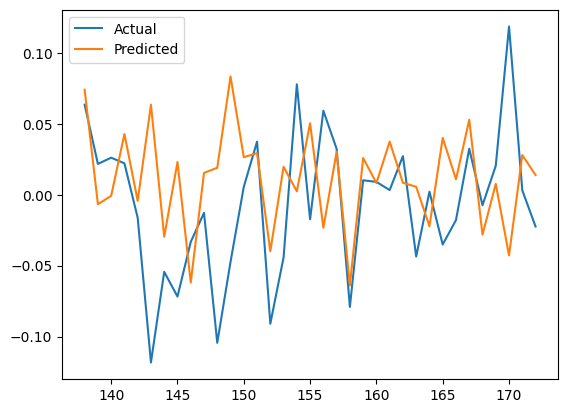

In [ ]:
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(22, 1, 22))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Plot the predictions
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

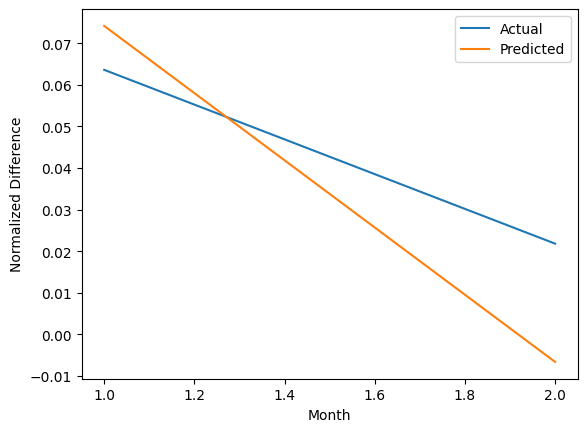

Forecasted values for the next 2 months:


KeyError: 0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named 'monthly_data' with a column 'normalize_diff'

# Splitting data into train and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(22, 1, 22))
model_fit = model.fit()

# Forecast the next 2 months
forecast_steps = 2
predictions = model_fit.forecast(steps=forecast_steps)

# Reset index of test data
test_reset_index = test.reset_index(drop=True)

# Plot the predictions
plt.plot(range(1, forecast_steps+1), test_reset_index[:forecast_steps], label='Actual')
plt.plot(range(1, forecast_steps+1), predictions, label='Predicted')
plt.xlabel('Month')
plt.ylabel('Normalized Difference')
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted values for the next 2 months:")
for i in range(forecast_steps):
    print(f"Month {i+1}: {predictions[i]}")

# Calculate the accuracy (RMSE) for the forecasted values
rmse = np.sqrt(mean_squared_error(test_reset_index[:forecast_steps], predictions))
print("Root Mean Squared Error (RMSE) for the next 2 months forecast:", rmse)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming your DataFrame is named 'monthly_data' with a column 'normalize_diff'

# Splitting data into train and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(22, 1, 22))
model_fit = model.fit()

# Forecast the next 2 months
forecast_steps = 2
predictions = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(predictions)

In [ ]:
print(predictions)

In [ ]:
import sqlite3
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named 'monthly_data' with a column 'normalize_diff'

# Splitting data into train and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Iterate over the next 12 months
for i in range(35):
    # Fit the ARIMA model
    model = ARIMA(np.asarray(train), order=(22, 1, 22))  # Convert train to a NumPy array
    model_fit = model.fit()

    # Forecast the next month
    forecast_steps = 1
    predictions = model_fit.forecast(steps=forecast_steps)

    # Reset index of test data
    test_reset_index = test.reset_index(drop=True)

    # Plot the predictions (optional)
    plt.plot(range(1, forecast_steps+1), test_reset_index[:forecast_steps], label='Actual')
    plt.plot(range(1, forecast_steps+1), predictions, label='Predicted')
    plt.xlabel('Month')
    plt.ylabel('Normalized Difference')
    plt.legend()
    plt.show()

    # Print the forecasted values
    print(f"Forecasted values for month {i+1}: {predictions[0]}")

    # Calculate the accuracy (RMSE) for the forecasted values
    rmse = np.sqrt(mean_squared_error(test_reset_index[:forecast_steps], predictions))
    print("Root Mean Squared Error (RMSE) for month {i+1} forecast:", rmse)

    # Insert the forecasted values and RMSE into the SQLite database
    data = f"Month {i+1}"
    model_name = "ARIMA"
    prediction = float(predictions[0])

    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse))
    conn.commit()

    # Update the test set for the next iteration
    train = np.append(train, test_reset_index[0])

# Close the connection
conn.close()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test, predictions)

# Calculate MSE
mse = mean_squared_error(test, predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
import sqlite3
from statsmodels.tsa.arima.model import ARIMA

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store ARIMA model results
cursor.execute('''CREATE TABLE IF NOT EXISTS arima
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Assuming 'monthly_data' is your DataFrame with the actual values
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(22, 1, 22))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
print(predictions)
print("-----------")
print(test)
# Insert actual and predicted values into the SQLite database
for i in range(len(test)):
    #for i in range(len(test)):
    cursor.execute("INSERT INTO arima (actual, predicted) VALUES (?, ?)", (test.iloc[i], predictions.iloc[i]))
conn.commit()

# Close the connection
conn.close()


**ANN**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming monthly_data['Close'] is your target variable
X = np.array(monthly_data['normalize_diff']).reshape(-1, 1)  # Reshape data for one feature
y = np.array(monthly_data['normalize_diff']).reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
#y_pred = model.predict(X_test_scaled)

# Evaluate the model
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error (RMSE):", rmse)
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Create a table to store the predictions if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS predictions
              (id INTEGER PRIMARY KEY, data TEXT, model TEXT, prediction REAL, rmse REAL)''')
conn.commit()

# Iterate over the next 12 months
for i in range(35):
    # Make predictions for the next month
    y_pred_next_month = model.predict(X_test_scaled[-1].reshape(1, -1))

    # Add the predicted value for the next month to the test set
    X_test_next_month = np.append(X_test_scaled[-1][1:], y_pred_next_month)

    # Reshape the test set for prediction
    X_test_next_month = X_test_next_month.reshape(1, -1)

    # Make predictions for the month after next
    y_pred_month_after_next = model.predict(X_test_next_month)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test[-1:], y_pred_next_month))

    # Print and insert the predictions and RMSE into the SQLite database
    data = "Month " + str(i+1)
    model_name = "ANN"
    prediction = float(y_pred_next_month[0][0])
    rmse_value = float(rmse)

    print(f"Data: {data}, Model: {model_name}, Prediction: {y_pred_next_month}, RMSE: {rmse_value}")

    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse_value))
    conn.commit()

    # Update the test set for the next iteration
    X_test_scaled = np.append(X_test_scaled, X_test_next_month, axis=0)

# Close the connection
conn.close()


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 8.5031e-04
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 4.9138e-04
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 2.4635e-04
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 1.2047e-04
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 3.1909e-05
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 1.5255e-05
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9327e-05
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 1.4992e-05
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 8.9606e-06
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 6.2106e-06
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 4.7322e-06
Epoch 13/100
5/5 

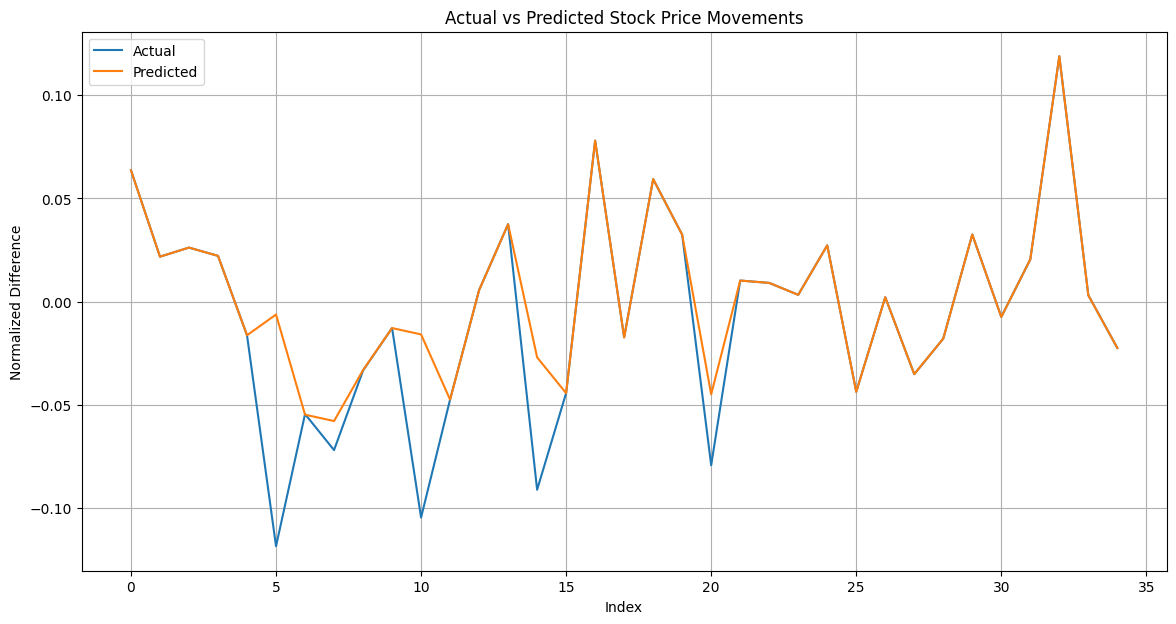

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Normalized Difference')
plt.title('Actual vs Predicted Stock Price Movements')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Forecasting the next 2 months
future_months = 12
X_future = np.array([y[-1]] * future_months).reshape(-1, 1)  # Use the last known value to predict the future
X_future_scaled = scaler.transform(X_future)
y_future = model.predict(X_future_scaled)

print(y_future)

1/1 [==============================] - 0s 20ms/step
[[-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]
 [-0.02242281]]


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming monthly_data['Close'] is your target variable
X = np.array(monthly_data['normalize_diff']).reshape(-1, 1)  # Reshape data for one feature
y = np.array(monthly_data['normalize_diff']).reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for the next month
y_pred_next_month = model.predict(X_test_scaled[-1].reshape(1, -1))

# Add the predicted value for the next month to the test set
X_test_next_month = np.append(X_test_scaled[-1][1:], y_pred_next_month)

# Reshape the test set for prediction
X_test_next_month = X_test_next_month.reshape(1, -1)

# Make predictions for the month after next
y_pred_month_after_next = model.predict(X_test_next_month)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[-1:], y_pred_next_month))
print("Root Mean Squared Error (RMSE) for next month prediction:", rmse)

# Print the predictions
print("Predicted value for next month:", y_pred_next_month)
print("Predicted value for the month after next:", y_pred_month_after_next)


Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 9.2563e-04
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 6.9904e-04
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 4.5487e-04
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 3.0628e-04
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 1.4599e-04
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 6.4480e-05
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9986e-05
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 2.4084e-05
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 2.6372e-05
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 2.4022e-05
Epoch 13/100
5/5 [===

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Create a table to store the predictions if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS predictions
              (id INTEGER PRIMARY KEY, data TEXT, model TEXT, prediction REAL, rmse REAL)''')
conn.commit()

# Iterate over the next 12 months
for i in range(35):
    # Make predictions for the next month
    y_pred_next_month = model.predict(X_test_scaled[-1].reshape(1, -1))

    # Add the predicted value for the next month to the test set
    X_test_next_month = np.append(X_test_scaled[-1][1:], y_pred_next_month)

    # Reshape the test set for prediction
    X_test_next_month = X_test_next_month.reshape(1, -1)

    # Make predictions for the month after next
    y_pred_month_after_next = model.predict(X_test_next_month)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test[-1:], y_pred_next_month))

    # Print and insert the predictions and RMSE into the SQLite database
    data = "Month " + str(i+1)
    model_name = "ANN"
    prediction = float(y_pred_next_month[0][0])
    rmse_value = float(rmse)

    print(f"Data: {data}, Model: {model_name}, Prediction: {prediction}, RMSE: {rmse_value}")

    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse_value))
    conn.commit()

    # Update the test set for the next iteration
    X_test_scaled = np.append(X_test_scaled, X_test_next_month, axis=0)

# Close the connection
conn.close()


1/1 [==============================] - 0s 27ms/step
Data: Month 1, Model: ANN, Prediction: -0.022223088890314102, RMSE: 0.00015333945266349236
1/1 [==============================] - 0s 32ms/step
Data: Month 2, Model: ANN, Prediction: -0.06296226382255554, RMSE: 0.04058583547957795
1/1 [==============================] - 0s 35ms/step
Data: Month 3, Model: ANN, Prediction: -0.060212548822164536, RMSE: 0.03783612047918694
1/1 [==============================] - 0s 19ms/step
Data: Month 4, Model: ANN, Prediction: -0.06032711640000343, RMSE: 0.03795068805702584
1/1 [==============================] - 0s 21ms/step
Data: Month 5, Model: ANN, Prediction: -0.0603223480284214, RMSE: 0.03794591968544381
1/1 [==============================] - 0s 20ms/step
Data: Month 6, Model: ANN, Prediction: -0.06032254919409752, RMSE: 0.037946120851119924
1/1 [==============================] - 0s 20ms/step
Data: Month 7, Model: ANN, Prediction: -0.060322534292936325, RMSE: 0.03794610594995873
1/1 [================

In [ ]:
import sqlite3
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store ANN model results
cursor.execute('''CREATE TABLE IF NOT EXISTS ann
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Assuming monthly_data['Close'] is your target variable
X = np.array(monthly_data['normalize_diff']).reshape(-1, 1)  # Reshape data for one feature
y = np.array(monthly_data['normalize_diff']).reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Insert actual and predicted values into the SQLite database
for i in range(len(y_test)):
    cursor.execute("INSERT INTO ann (actual, predicted) VALUES (?, ?)", (y_test[i][0], y_pred[i][0]))
conn.commit()

# Close the connection
conn.close()


Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 8.8377e-04
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 6.5022e-04
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 4.5543e-04
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9687e-04
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 1.8161e-04
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0779e-04
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 5.8830e-05
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 3.4028e-05
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 1.4183e-05
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 8.0081e-06
Epoch 13/100
5/5 [===

In [ ]:
print(y_pred)
print(y_test)

[[ 0.06363047]
 [ 0.02177173]
 [ 0.02617476]
 [ 0.0221645 ]
 [-0.01629519]
 [-0.08860306]
 [-0.05551111]
 [-0.06655355]
 [-0.03327598]
 [-0.01279429]
 [-0.07927891]
 [-0.04683647]
 [ 0.00555377]
 [ 0.0375229 ]
 [-0.07145985]
 [-0.04400324]
 [ 0.07797303]
 [-0.01732568]
 [ 0.05935371]
 [ 0.03242796]
 [-0.06821592]
 [ 0.01020858]
 [ 0.00906201]
 [ 0.00328645]
 [ 0.02726794]
 [-0.04339428]
 [ 0.00213549]
 [-0.03507045]
 [-0.01793427]
 [ 0.03251156]
 [-0.00742322]
 [ 0.02047139]
 [ 0.11864872]
 [ 0.00308818]
 [-0.02246405]]
[[ 0.06362646]
 [ 0.02181895]
 [ 0.02621659]
 [ 0.02221124]
 [-0.01620138]
 [-0.11833139]
 [-0.05436987]
 [-0.07180137]
 [-0.03326659]
 [-0.01270478]
 [-0.10445536]
 [-0.0473158 ]
 [ 0.00562083]
 [ 0.03755083]
 [-0.09099847]
 [-0.04419213]
 [ 0.07799839]
 [-0.01723062]
 [ 0.05935492]
 [ 0.03246212]
 [-0.0791208 ]
 [ 0.01026995]
 [ 0.00912479]
 [ 0.00335629]
 [ 0.02730842]
 [-0.04356018]
 [ 0.00220672]
 [-0.03507405]
 [-0.01783846]
 [ 0.03254563]
 [-0.00734028]
 [ 0.0205

**ETS**

In [ ]:
import sqlite3
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store ETS model results
cursor.execute('''CREATE TABLE IF NOT EXISTS ETS
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Split the data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Train the ETS model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(len(test))

# Insert actual and predicted values into the SQLite database
for i in range(len(test)):
    cursor.execute("INSERT INTO ETS (actual, predicted) VALUES (?, ?)", (test.iloc[i], predictions.iloc[i]))
conn.commit()

# Close the connection
conn.close()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predictions

136    0.041834
137    0.003051
138   -0.008049
139   -0.006925
140   -0.023870
141    0.014620
142    0.029684
143    0.048373
144   -0.018467
145    0.027014
146    0.010976
147    0.036461
148    0.042917
149    0.004134
150   -0.006966
151   -0.005842
152   -0.022787
153    0.015703
154    0.030767
155    0.049456
156   -0.017384
157    0.028098
158    0.012059
159    0.037544
160    0.044000
161    0.005218
162   -0.005883
163   -0.004759
164   -0.021704
165    0.016786
166    0.031850
167    0.050539
168   -0.016301
169    0.029181
170    0.013142
dtype: float64

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Train the ETS model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions for the next two months
predictions_next_month = model_fit.forecast(steps=1)
predictions_month_after_next = model_fit.forecast(steps=2)

# Calculate RMSE for the next month
rmse_next_month = np.sqrt(mean_squared_error(test[:1], predictions_next_month))
print("Root Mean Squared Error (RMSE) for next month prediction:", rmse_next_month)

# Calculate RMSE for the month after next
rmse_month_after_next = np.sqrt(mean_squared_error(test[1:2], predictions_month_after_next[-1:]))
print("Root Mean Squared Error (RMSE) for the month after next prediction:", rmse_month_after_next)

# Print the predictions
print("Predicted value for next month:", predictions_next_month)
print("Predicted value for the month after next:", predictions_month_after_next[-1:])


Root Mean Squared Error (RMSE) for next month prediction: 0.021792562479361316
Root Mean Squared Error (RMSE) for the month after next prediction: 0.01876757430927436
Predicted value for next month: 136    0.041834
dtype: float64
Predicted value for the month after next: 137    0.003051
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
import sqlite3
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming your DataFrame is named 'monthly_data' with a column 'normalize_diff'

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Splitting data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Train the ETS model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions for the next 12 months
predictions = model_fit.forecast(steps=35)

# Calculate RMSE for each month and insert into the SQLite database
for i in range(35):
    # Calculate RMSE for the current month
    rmse = np.sqrt(mean_squared_error(test[i:i+1], [predictions.iloc[i]]))

    # Insert the forecasted values and RMSE into the SQLite database
    data = f"Month {i+1}"
    model_name = "ETS"
    prediction = float(predictions.iloc[i])
    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse))
    conn.commit()

    # Print the predictions and RMSE
    print(f"Month {i+1} - Prediction: {prediction}, RMSE: {rmse}")

# Close the connection
conn.close()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Month 1 - Prediction: 0.04183389622054548, RMSE: 0.021792562479361316
Month 2 - Prediction: 0.0030513770844286855, RMSE: 0.01876757430927436
Month 3 - Prediction: -0.008049159714357103, RMSE: 0.03426574634598317
Month 4 - Prediction: -0.006925146859402579, RMSE: 0.02913638523418636
Month 5 - Prediction: -0.02386984137677159, RMSE: 0.007668459570032565
Month 6 - Prediction: 0.01461982465418664, RMSE: 0.1329512117370073
Month 7 - Prediction: 0.02968408360476586, RMSE: 0.08405395084792659
Month 8 - Prediction: 0.04837267375962276, RMSE: 0.12017404168468707
Month 9 - Prediction: -0.018467132672400723, RMSE: 0.01479945715257449
Month 10 - Prediction: 0.0270144009954911, RMSE: 0.039719177976963976
Month 11 - Prediction: 0.01097572921653497, RMSE: 0.11543108711134228
Month 12 - Prediction: 0.036460905984724706, RMSE: 0.0837767107866366
Month 13 - Prediction: 0.04291701716041516, RMSE: 0.0372961892750989
Month 14 - Prediction: 0.004134498024298364, RMSE: 0.03341632926547918
Month 15 - Predicti

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Train the ETS model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.05842310686129278


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


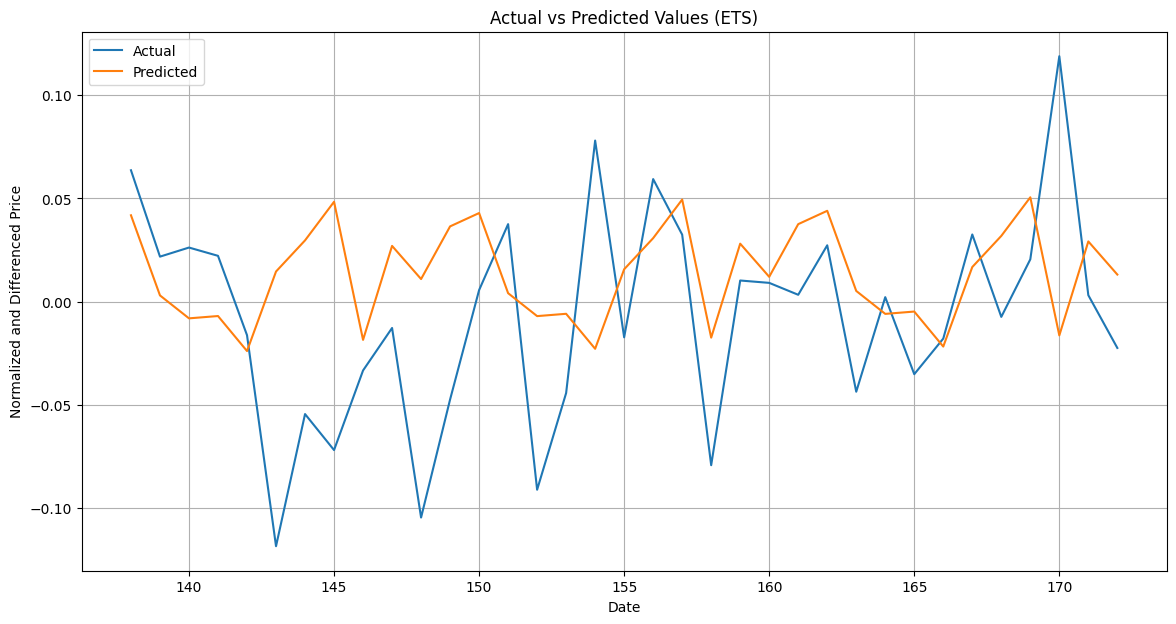

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index[train_size:], test, label='Actual')
plt.plot(monthly_data.index[train_size:], predictions, label='Predicted')
plt.title('Actual vs Predicted Values (ETS)')
plt.xlabel('Date')
plt.ylabel('Normalized and Differenced Price')
plt.legend()
plt.grid(True)
plt.show()

**lstm**

In [ ]:
import sqlite3
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store LSTM model results
cursor.execute('''CREATE TABLE IF NOT EXISTS LSTM
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Prepare the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(monthly_data['normalize_diff']).reshape(-1, 1))

# Split the data into training and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM input (samples, timesteps, features)
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))

# Train the LSTM model
model.fit(X_train, train, epochs=100, batch_size=1, verbose=1)

# Make predictions
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Insert actual and predicted values into the SQLite database
for i in range(len(predictions)):
    cursor.execute("INSERT INTO LSTM (actual, predicted) VALUES (?, ?)", (np.array(monthly_data['normalize_diff'])[train_size + i], predictions[i]))
conn.commit()

# Close the connection
conn.close()


Epoch 1/100
136/136 [==============================] - 3s 3ms/step - loss: 0.0773
Epoch 2/100
136/136 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 6.1757e-04
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 3.4053e-04
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 1.8245e-04
Epoch 12/100
136/136 [==============================] - 0s 3ms/step - loss: 8.6203e-

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Prepare the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(monthly_data['normalize_diff']).reshape(-1, 1))

# Split the data into training and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM input (samples, timesteps, features)
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))

# Train the LSTM model
model.fit(X_train, train, epochs=100, batch_size=1, verbose=1)

# Make predictions
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(np.array(monthly_data['normalize_diff'])[train_size:], predictions))
print("Root Mean Squared Error (RMSE):", rmse)


Epoch 1/100
136/136 [==============================] - 3s 4ms/step - loss: 0.0705
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 0.0056
Epoch 3/100
136/136 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 4/100
136/136 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 5/100
136/136 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 9.8027e-04
Epoch 9/100
136/136 [==============================] - 0s 2ms/step - loss: 5.8520e-04
Epoch 10/100
136/136 [==============================] - 0s 2ms/step - loss: 3.1654e-04
Epoch 11/100
136/136 [==============================] - 0s 2ms/step - loss: 1.6007e-04
Epoch 12/100
136/136 [==============================] - 0s 2ms/step - loss: 8.51

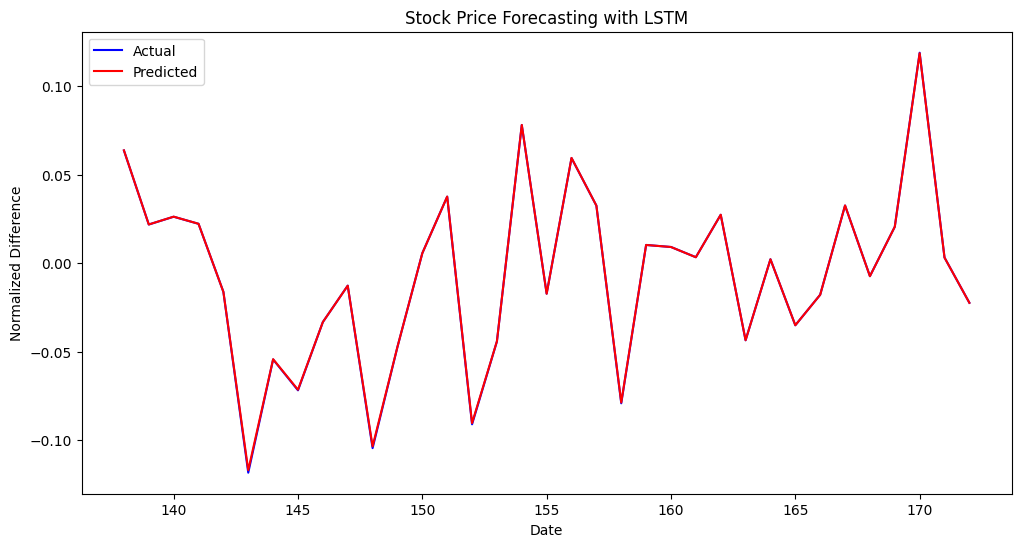

In [ ]:
import matplotlib.pyplot as plt

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index[train_size:], np.array(monthly_data['normalize_diff'])[train_size:], label='Actual', color='blue')
plt.plot(monthly_data.index[train_size:], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Normalized Difference')
plt.title('Stock Price Forecasting with LSTM')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Prepare the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(monthly_data['normalize_diff']).reshape(-1, 1))

# Split the data into training and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM input (samples, timesteps, features)
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))

# Train the LSTM model
model.fit(X_train, train, epochs=100, batch_size=1, verbose=1)

# Make predictions for the next month
X_test_next_month = np.reshape(test[:1], (1, 1, 1))  # Reshape the first test data point for prediction
predictions_next_month = model.predict(X_test_next_month)

# Make predictions for the month after next
X_test_month_after_next = np.concatenate((X_test_next_month, np.reshape(predictions_next_month, (1, 1, 1))), axis=1)
predictions_month_after_next = model.predict(X_test_month_after_next)

# Inverse transform the predictions
predictions_next_month = scaler.inverse_transform(predictions_next_month)
predictions_month_after_next = scaler.inverse_transform(predictions_month_after_next)

# Print the predicted values for the next 2 months
print("Predicted value for next month:", predictions_next_month[0][0])
print("Predicted value for the month after next:", predictions_month_after_next[0][0])


Epoch 1/100
136/136 [==============================] - 5s 4ms/step - loss: 0.0862
Epoch 2/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 3/100
136/136 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 8.9802e-04
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 5.3607e-04
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 2.5577e-04
Epoch 12/100
136/136 [==============================] - 1s 6ms/step - loss: 1.3445e-

1/1 [==============================] - 0s 443ms/step
Predicted value for next month: 0.06378515
Predicted value for the month after next: 0.18877845


In [ ]:
import sqlite3
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Prepare the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(monthly_data['normalize_diff']).reshape(-1, 1))

# Split the data into training and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM input (samples, timesteps, features)
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))

# Train the LSTM model
model.fit(X_train, train, epochs=100, batch_size=1, verbose=1)

# Make predictions for the next 12 months
predictions = []
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))
for i in range(35):
    # Predict the next month
    X_test_next_month = X_test[i].reshape(1, 1, 1)
    prediction_next_month = model.predict(X_test_next_month)
    predictions.append(prediction_next_month[0][0])

    # Update X_test for the next prediction
    X_test = np.concatenate((X_test, prediction_next_month.reshape(1, 1, 1)), axis=0)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Calculate RMSE for each month and insert into the SQLite database
for i in range(35):
    # Calculate RMSE for the current month
    actual_month = monthly_data.iloc[-35 + i]['normalize_diff']
    rmse = np.sqrt(mean_squared_error([actual_month], [predictions[i]]))

    # Insert the forecasted values and RMSE into the SQLite database
    data = f"Month {i+1}"
    model_name = "LSTM"
    prediction = predictions[i][0]
    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse))
    conn.commit()

    # Print the predictions and RMSE
    print(f"Month {i+1} - Prediction: {prediction}, RMSE: {rmse}")

# Close the connection
conn.close()


Epoch 1/100
136/136 [==============================] - 3s 3ms/step - loss: 0.0790
Epoch 2/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 7.3490e-04
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 4.6582e-04
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 2.3124e-04
Epoch 12/100
136/136 [==============================] - 0s 3ms/step - loss: 1.2741e-

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Prepare the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(monthly_data['normalize_diff']).reshape(-1, 1))

# Split the data into training and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM input (samples, timesteps, features)
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))

# Train the LSTM model
model.fit(X_train, train, epochs=100, batch_size=1, verbose=1)

# Make predictions for the next month
X_test_next_month = np.reshape(test[:1], (1, 1, 1))  # Reshape the first test data point for prediction
predictions_next_month = model.predict(X_test_next_month)

# Make predictions for the month after next
X_test_month_after_next = np.concatenate((X_test_next_month, np.reshape(predictions_next_month, (1, 1, 1))), axis=1)
predictions_month_after_next = model.predict(X_test_month_after_next)

# Inverse transform the predictions
predictions_next_month = scaler.inverse_transform(predictions_next_month)
predictions_month_after_next = scaler.inverse_transform(predictions_month_after_next)

# Calculate RMSE for the next month
actual_next_month = scaler.inverse_transform(test[:1])
rmse_next_month = np.sqrt(mean_squared_error(actual_next_month, predictions_next_month))
print("RMSE for next month:", rmse_next_month)

# Calculate RMSE for the month after next
actual_month_after_next = scaler.inverse_transform(test[1:2])
rmse_month_after_next = np.sqrt(mean_squared_error(actual_month_after_next, predictions_month_after_next))
print("RMSE for the month after next:", rmse_month_after_next)

# Print the predicted values for the next 2 months
print("Predicted value for next month:", predictions_next_month[0][0])
print("Predicted value for the month after next:", predictions_month_after_next[0][0])


Epoch 1/100
136/136 [==============================] - 4s 5ms/step - loss: 0.0842
Epoch 2/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0065
Epoch 3/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0056
Epoch 4/100
136/136 [==============================] - 1s 5ms/step - loss: 0.0042
Epoch 5/100
136/136 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 7.1420e-04
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 3.8296e-04
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 1.7047e-04
Epoch 12/100
136/136 [==============================] - 1s 4ms/step - loss: 8.1048e-

1/1 [==============================] - 0s 440ms/step
RMSE for next month: 0.0002664903356680709
RMSE for the month after next: 0.16813827988948482
Predicted value for next month: 0.06335997
Predicted value for the month after next: 0.18995723


**SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

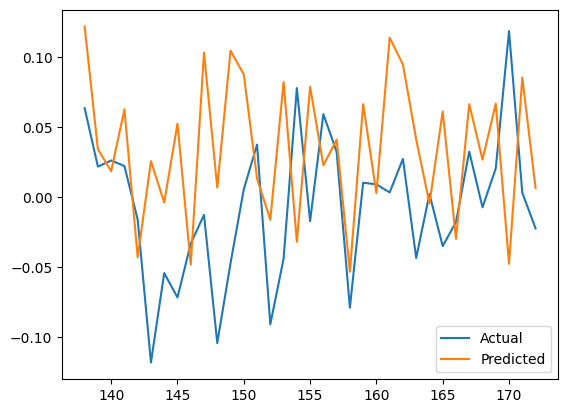

Root Mean Squared Error (RMSE): 0.07980269350430785


In [ ]:
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the SARIMA model
model = SARIMAX(train, order=(22, 1, 22), seasonal_order=(0, 1, 0, 12))  # Assuming P=1, D=1, Q=1, and m=12
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Plot the predictions
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
import sqlite3
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store SARIMA model results
cursor.execute('''CREATE TABLE IF NOT EXISTS SARIMA
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Split the data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the SARIMA model
model = SARIMAX(train, order=(22, 1, 22), seasonal_order=(0, 1, 0, 12))  # Assuming P=1, D=1, Q=1, and m=12
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Insert actual and predicted values into the SQLite database
for i in range(len(predictions)):
    cursor.execute("INSERT INTO SARIMA (actual, predicted) VALUES (?, ?)", (test.iloc[i], predictions.iloc[i]))
conn.commit()

# Close the connection
conn.close()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

Root Mean Squared Error (RMSE): 0.07980269350430785


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Assuming you have a DataFrame 'monthly_data' with a column 'normalize_diff'
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the SARIMA model
model = SARIMAX(train, order=(22, 1, 22), seasonal_order=(0, 1, 0, 12))  # Assuming P=1, D=1, Q=1, and m=12
model_fit = model.fit()

# Make predictions for the next 12 months
predictions = model_fit.forecast(steps=12)
print(predictions)
# Calculate RMSE for each month and insert into the SQLite database
for i in range():
    # Make prediction for the current month
    #prediction = predictions[i]
    prediction = float(predictions.iloc[i])
    # Calculate RMSE for the current month
    rmse = np.sqrt(mean_squared_error([test.iloc[i]], [prediction]))

    # Insert the forecasted values and RMSE into the SQLite database
    data = f"Month {i+1}"
    model_name = "SARIMA"
    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse))
    conn.commit()

    # Print the predictions and RMSE
    print(f"Month {i+1} - Prediction: {prediction}, RMSE: {rmse}")

# Close the connection
conn.close()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

136    0.122081
137    0.034301
138    0.018515
139    0.062814
140   -0.043129
141    0.025754
142   -0.003864
143    0.052533
144   -0.048329
145    0.103375
146    0.006805
147    0.104827
Name: predicted_mean, dtype: float64
Month 1 - Prediction: 0.12208126952425227, RMSE: 0.05845481082434548
Month 2 - Prediction: 0.034300647806746784, RMSE: 0.012481696413043739
Month 3 - Prediction: 0.018515355397143968, RMSE: 0.007701231234482103
Month 4 - Prediction: 0.0628139856496606, RMSE: 0.040602747274876824
Month 5 - Prediction: -0.04312860667781454, RMSE: 0.026927224871075517
Month 6 - Prediction: 0.025754234494632544, RMSE: 0.1440856215774532
Month 7 - Prediction: -0.003864340660479068, RMSE: 0.05050552658268166
Month 8 - Prediction: 0.05253295452510964, RMSE: 0.12433432245017395
Month 9 - Prediction: -0.04832875068106527, RMSE: 0.015062160856090058
Month 10 - Prediction: 0.10337473425778324, RMSE: 0.11607951123925611
Month 11 - Prediction: 0.0068051954130930615, RMSE: 0.1112605533079003

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

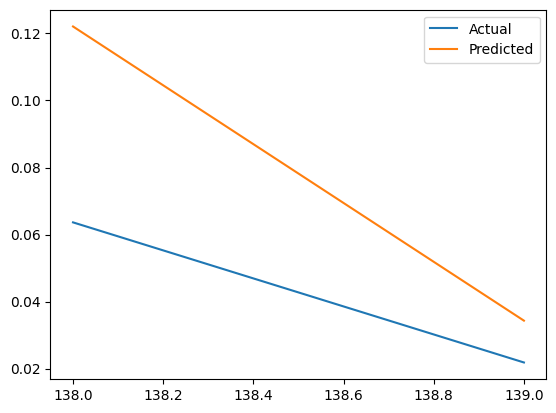

Root Mean Squared Error (RMSE) for the next 2 months: 0.042265574962712896
136    0.122081
137    0.034301
Name: predicted_mean, dtype: float64


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the SARIMA model
model = SARIMAX(train, order=(22, 1, 22), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()

# Make predictions for the next 2 months
forecast_steps = 2
predictions = model_fit.forecast(steps=forecast_steps)

# Plot the predictions
plt.plot(test.index[:forecast_steps], test.values[:forecast_steps], label='Actual')
plt.plot(test.index[:forecast_steps], predictions, label='Predicted')
plt.legend()
plt.show()

# Calculate RMSE for the next 2 months
rmse = np.sqrt(mean_squared_error(test[:forecast_steps], predictions))
print("Root Mean Squared Error (RMSE) for the next 2 months:", rmse)

# Print the predicted values for the next 2 months

print(predictions)

**Prophet**

In [ ]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = monthly_data[['Date', 'normalize_diff']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns as required by Prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp2kfj6j/wlem2zd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp2kfj6j/f3xj4o1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25631', 'data', 'file=/tmp/tmpzp2kfj6j/wlem2zd6.json', 'init=/tmp/tmpzp2kfj6j/f3xj4o1g.json', 'output', 'file=/tmp/tmpzp2kfj6j/prophet_modelxc0v2mr8/prophet_model-20240513145232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


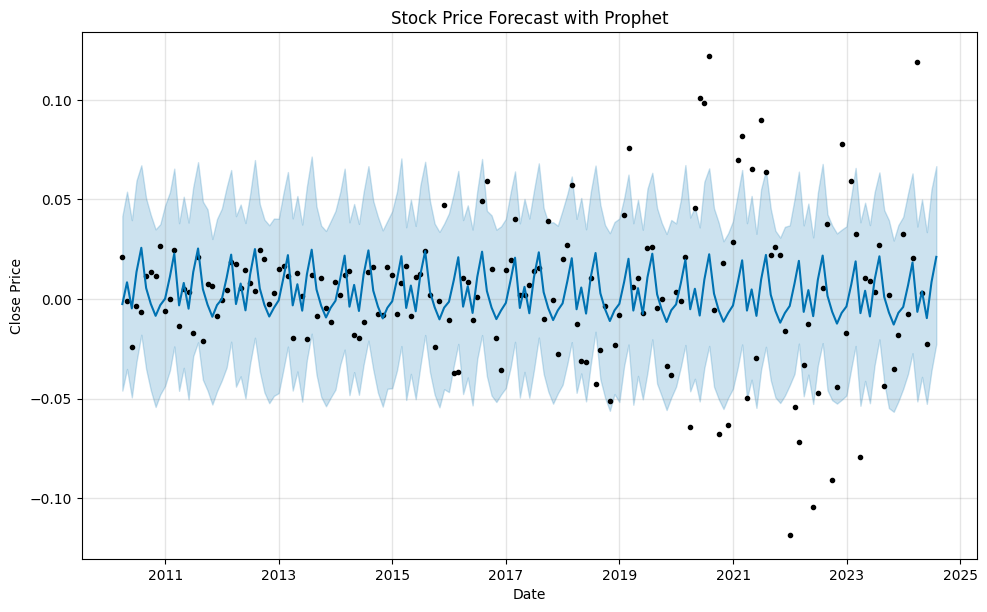

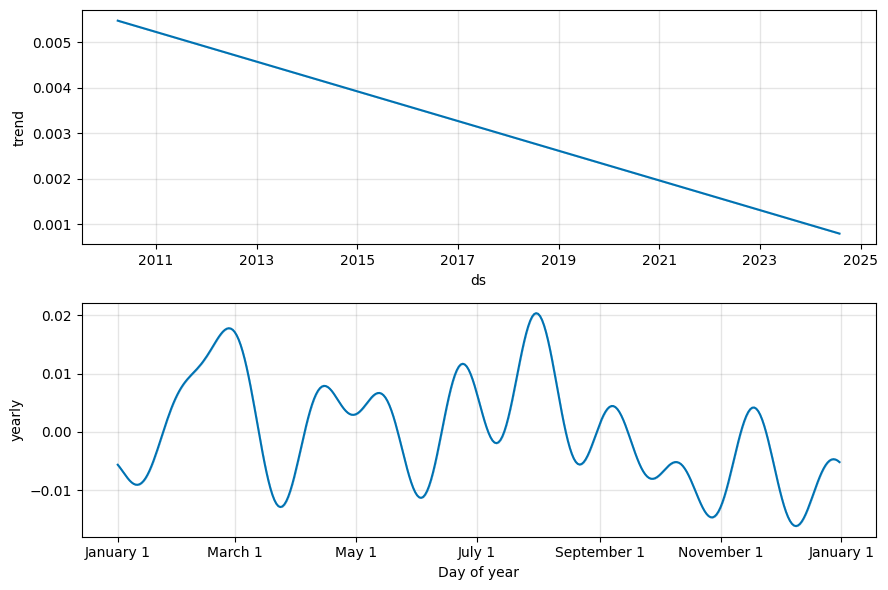

In [ ]:

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting 12 months into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Forecast with Prophet')
plt.show()

# Plot the components of the forecast
fig = model.plot_components(forecast)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp2kfj6j/snf67cok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp2kfj6j/j7no9b8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69983', 'data', 'file=/tmp/tmpzp2kfj6j/snf67cok.json', 'init=/tmp/tmpzp2kfj6j/j7no9b8b.json', 'output', 'file=/tmp/tmpzp2kfj6j/prophet_modelo0xqv884/prophet_model-20240513171928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


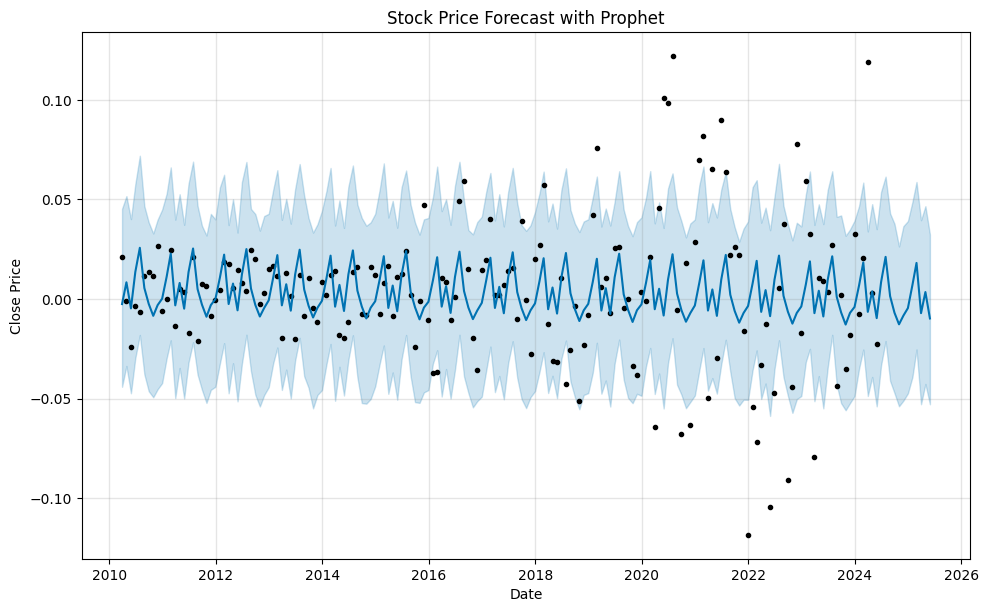

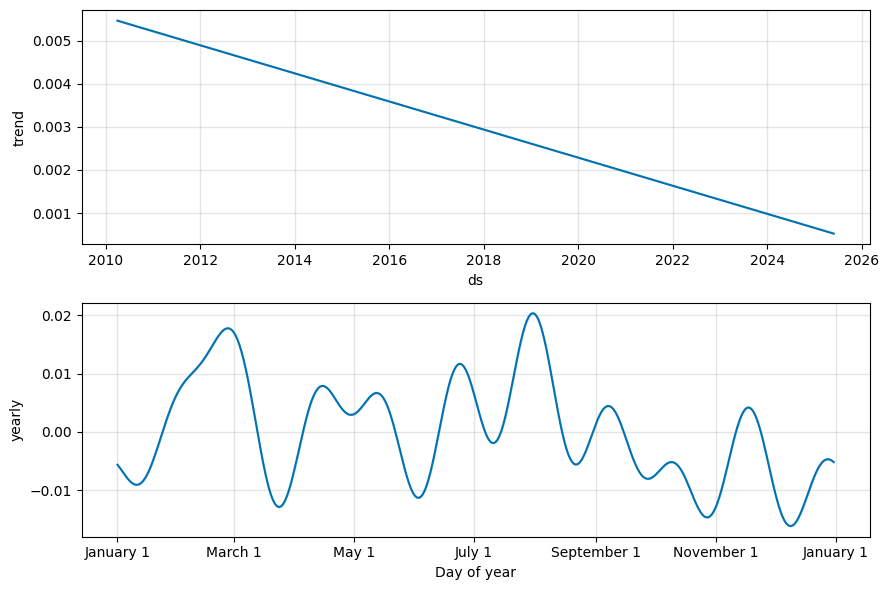

            ds      yhat
171 2024-06-30  0.008423
172 2024-07-31  0.021120
173 2024-08-31  0.001382
174 2024-09-30 -0.006925
175 2024-10-31 -0.012724
176 2024-11-30 -0.008381
177 2024-12-31 -0.004580
178 2025-01-31  0.006978
179 2025-02-28  0.018081
180 2025-03-31 -0.007120
181 2025-04-30  0.003481
182 2025-05-31 -0.009783


In [ ]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = monthly_data[['Date', 'normalize_diff']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting 2 months into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Forecast with Prophet')
plt.show()

# Plot the components of the forecast
fig = model.plot_components(forecast)
plt.show()

# Print the forecasted values for the next 2 months
forecast_next_2_months = forecast[['ds', 'yhat']].tail(12)
print(forecast_next_2_months)


In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Create a new table for predictions if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS predictions (
                    id INTEGER PRIMARY KEY,
                    data TEXT,
                    model TEXT,
                    prediction REAL,
                    rmse REAL
                )''')
conn.commit()

# Assuming you have a DataFrame 'monthly_data' with a column 'normalize_diff'
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['normalize_diff'][:train_size], monthly_data['normalize_diff'][train_size:]

# Fit the SARIMA model
model = SARIMAX(train, order=(22, 1, 22), seasonal_order=(0, 1, 0, 12))  # Assuming P=1, D=1, Q=1, and m=12
model_fit = model.fit()

# Make predictions for the next 12 months
predictions = model_fit.forecast(steps=48)

# Calculate RMSE for each month and insert into the SQLite database
for i in range(48):
    # Make prediction for the current month
    prediction = float(predictions.iloc[i])

    # Calculate RMSE for the current month
    rmse = np.sqrt(mean_squared_error([test.iloc[i]], [prediction]))

    # Insert the forecasted values and RMSE into the SQLite database
    data = f"Month {i+1}"
    model_name = "SARIMA"
    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse))
    conn.commit()

    # Print the predictions and RMSE
    print(f"Month {i+1} - Prediction: {prediction}, RMSE: {rmse}")

# Close the connection
conn.close()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

Month 1 - Prediction: 0.12208126952425227, RMSE: 0.05845481082434548
Month 2 - Prediction: 0.034300647806746784, RMSE: 0.012481696413043739
Month 3 - Prediction: 0.018515355397143968, RMSE: 0.007701231234482103
Month 4 - Prediction: 0.0628139856496606, RMSE: 0.040602747274876824
Month 5 - Prediction: -0.04312860667781454, RMSE: 0.026927224871075517
Month 6 - Prediction: 0.025754234494632544, RMSE: 0.1440856215774532
Month 7 - Prediction: -0.003864340660479068, RMSE: 0.05050552658268166
Month 8 - Prediction: 0.05253295452510964, RMSE: 0.12433432245017395
Month 9 - Prediction: -0.04832875068106527, RMSE: 0.015062160856090058
Month 10 - Prediction: 0.10337473425778324, RMSE: 0.11607951123925611
Month 11 - Prediction: 0.0068051954130930615, RMSE: 0.11126055330790037
Month 12 - Prediction: 0.10482713936804708, RMSE: 0.15214294416995897
Month 13 - Prediction: 0.0877856633678961, RMSE: 0.08216483548257984
Month 14 - Prediction: 0.01322520849631099, RMSE: 0.024325618793466557
Month 15 - Predic

IndexError: single positional indexer is out-of-bounds

In [ ]:
conn = sqlite3.connect('Prediction.db')
cursor = conn.cursor()

# Create a new table for predictions if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS predictions (
                    id INTEGER PRIMARY KEY,
                    data TEXT,
                    model TEXT,
                    prediction REAL,
                    rmse REAL
                )''')
conn.commit()

In [ ]:
import sqlite3
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'monthly_data' with columns 'Date' and 'normalize_diff'

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Prepare the data for Prophet
prophet_data = monthly_data[['Date', 'normalize_diff']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions for 12 months
future = model.make_future_dataframe(periods=48, freq='M')
forecast = model.predict(future)

# Calculate RMSE for each month and insert into the SQLite database
for i in range(35):
    # Extract the forecasted value for the current month
    forecast_month = forecast.iloc[-35 + i]['yhat']

    # Calculate RMSE for the current month
    actual_month = monthly_data.iloc[-35 + i]['normalize_diff']
    rmse = mean_squared_error([actual_month], [forecast_month], squared=False)

    # Insert the forecasted values and RMSE into the SQLite database
    data = f"Month {i+1}"
    model_name = "Prophet"
    prediction = forecast_month
    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse))
    conn.commit()

    # Print the predictions and RMSE
    print(f"Month {i+1} - Prediction: {prediction}, RMSE: {rmse}")

# Close the connection
conn.close()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp2kfj6j/aj8lnzwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzp2kfj6j/yxizlali.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63571', 'data', 'file=/tmp/tmpzp2kfj6j/aj8lnzwc.json', 'init=/tmp/tmpzp2kfj6j/yxizlali.json', 'output', 'file=/tmp/tmpzp2kfj6j/prophet_model5arfzxei/prophet_model-20240513191051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Month 1 - Prediction: 0.020796399331029274, RMSE: 0.04283005936887752
Month 2 - Prediction: 0.0008254023490135536, RMSE: 0.020993549044689492
Month 3 - Prediction: -0.0073113406674890045, RMSE: 0.03352792729911508
Month 4 - Prediction: -0.01320889139558015, RMSE: 0.035420129770363934
Month 5 - Prediction: -0.008348947434533948, RMSE: 0.007852434372205076
Month 6 - Prediction: -0.004824827718632664, RMSE: 0.11350655936418799
Month 7 - Prediction: 0.006480936460102893, RMSE: 0.06085080370326362
Month 8 - Prediction: 0.01782412123982984, RMSE: 0.08962548916489414
Month 9 - Prediction: -0.0077761071687118734, RMSE: 0.025490482656263337
Month 10 - Prediction: 0.0031495115108677177, RMSE: 0.015854288492340593
Month 11 - Prediction: -0.009939793004831289, RMSE: 0.09451556488997602
Month 12 - Prediction: 0.008331336667204769, RMSE: 0.05564714146911666
Month 13 - Prediction: 0.020454886532208023, RMSE: 0.014834058646891763
Month 14 - Prediction: 0.00026633329292066586, RMSE: 0.03728449399685688

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get the actual values for the next 2 months
actual_next_2_months = monthly_data['normalize_diff'][-2:].values

# Get the predicted values for the next 2 months from the forecast
predicted_next_2_months = forecast['yhat'][-2:].values

# Calculate RMSE for the next 2 months
rmse_next_2_months = np.sqrt(mean_squared_error(actual_next_2_months, predicted_next_2_months))

print("RMSE for the next 2 months:", rmse_next_2_months)


RMSE for the next 2 months: 0.030981306507568536


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz77utyi0/p5ge_0ik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz77utyi0/vseeznvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53051', 'data', 'file=/tmp/tmpz77utyi0/p5ge_0ik.json', 'init=/tmp/tmpz77utyi0/vseeznvo.json', 'output', 'file=/tmp/tmpz77utyi0/prophet_modeldn19ktw0/prophet_model-20240514145218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error (RMSE): 0.0344941244606283


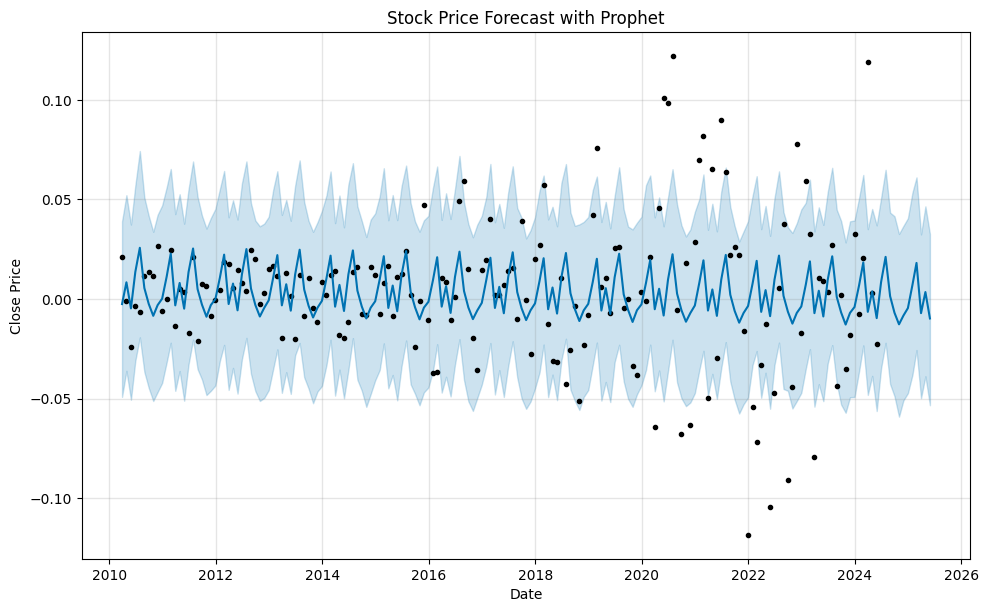

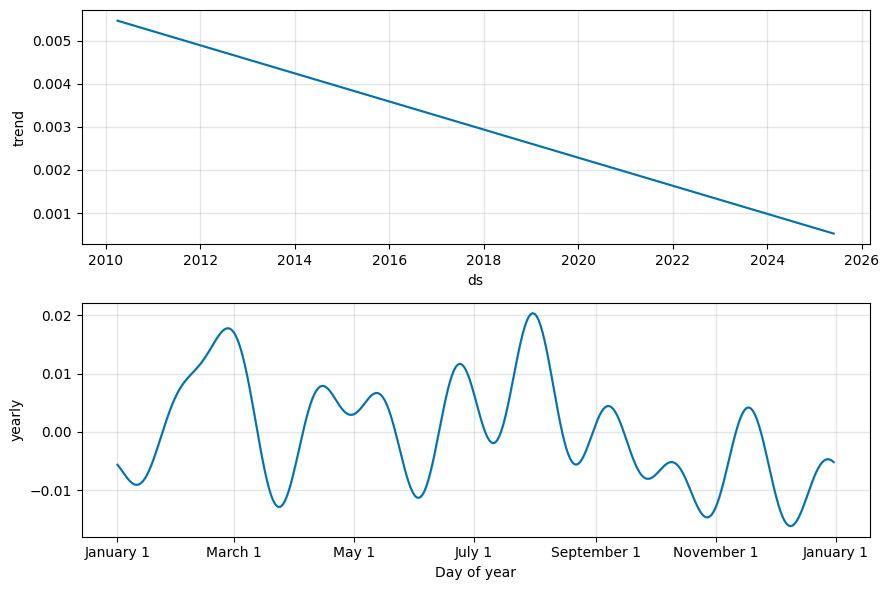

In [ ]:
import sqlite3
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store Prophet model results
cursor.execute('''CREATE TABLE IF NOT EXISTS prophet
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Prepare the data for Prophet
prophet_data = monthly_data[['Date', 'normalize_diff']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting 12 months into the future
forecast = model.predict(future)

# Insert actual and predicted values into the SQLite database
predicted_test = forecast[['ds', 'yhat']].merge(prophet_data, on='ds', how='inner')
predicted_test.dropna(inplace=True)
for i in range(len(predicted_test) - 35, len(predicted_test)):
    cursor.execute("INSERT INTO prophet (actual, predicted) VALUES (?, ?)", (predicted_test['y'][i], predicted_test['yhat'][i]))
conn.commit()

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(predicted_test['y'], predicted_test['yhat']))
print("Root Mean Squared Error (RMSE):", rmse)

# Close the connection
conn.close()

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Forecast with Prophet')
plt.show()

# Plot the components of the forecast
fig = model.plot_components(forecast)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkarl6dc3/8bv7z1l7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkarl6dc3/bm639nxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90268', 'data', 'file=/tmp/tmpkarl6dc3/8bv7z1l7.json', 'init=/tmp/tmpkarl6dc3/bm639nxy.json', 'output', 'file=/tmp/tmpkarl6dc3/prophet_modelykifl_d2/prophet_model-20240513060629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:06:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error (RMSE): 0.0344941244606283


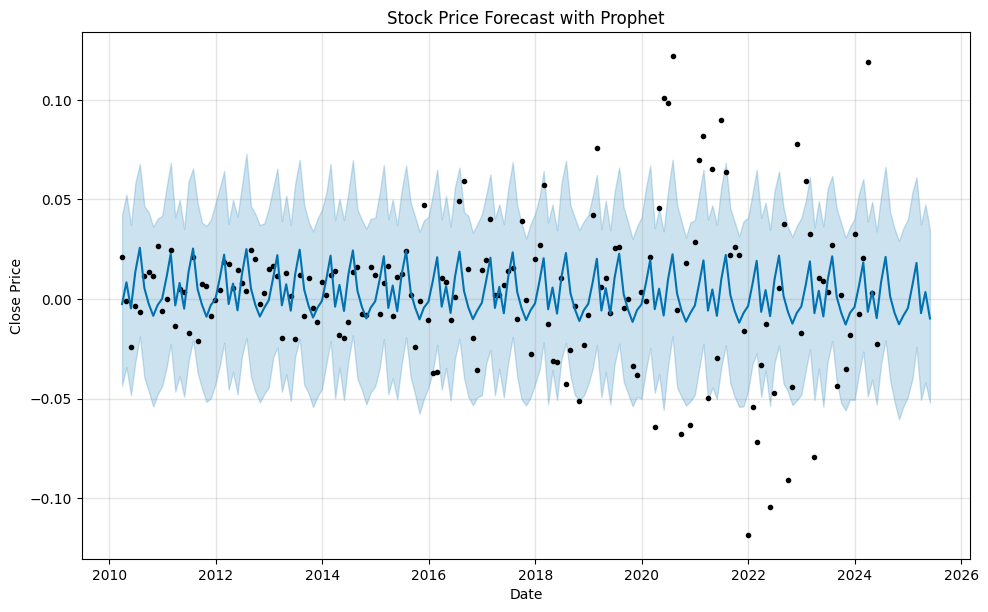

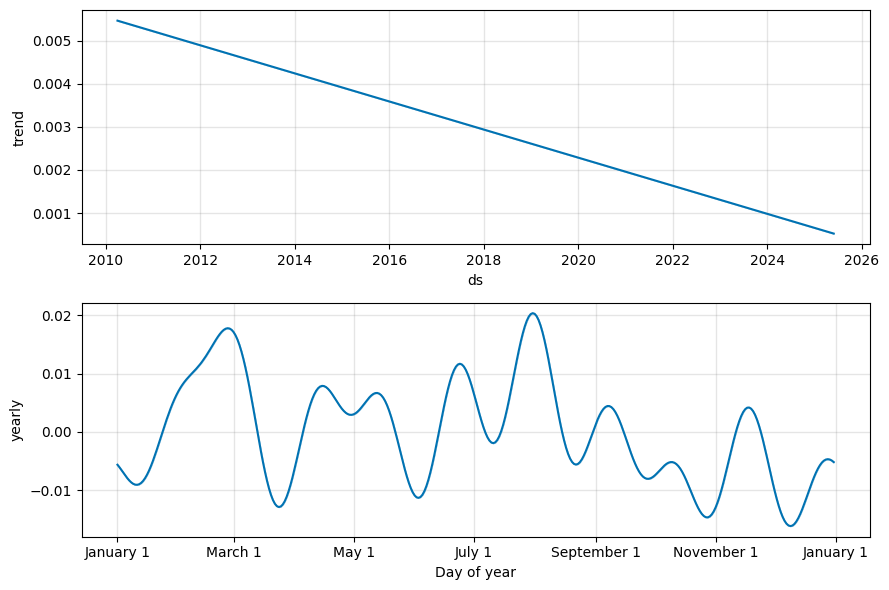

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for Prophet
prophet_data = monthly_data[['Date', 'normalize_diff']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting 12 months into the future
forecast = model.predict(future)

# Calculate the RMSE
predicted_test = forecast[['ds', 'yhat']].merge(prophet_data, on='ds', how='inner')
predicted_test.dropna(inplace=True)
rmse = np.sqrt(mean_squared_error(predicted_test['y'], predicted_test['yhat']))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Forecast with Prophet')
plt.show()

# Plot the components of the forecast
fig = model.plot_components(forecast)
plt.show()


In [ ]:
import sqlite3
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store Prophet model results
cursor.execute('''CREATE TABLE IF NOT EXISTS prophet
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Prepare the data for Prophet
prophet_data = monthly_data[['Date', 'normalize_diff']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting 12 months into the future
forecast = model.predict(future)

# Insert actual and predicted values into the SQLite database
predicted_test = forecast[['ds', 'yhat']].merge(prophet_data, on='ds', how='inner')
predicted_test.dropna(inplace=True)
for i in range(len(predicted_test)):
    cursor.execute("INSERT INTO prophet (actual, predicted) VALUES (?, ?)", (predicted_test['y'][i], predicted_test['yhat'][i]))
conn.commit()
# Close the connection
conn.close()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz77utyi0/yu1tbtzs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz77utyi0/j5j3udzm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27964', 'data', 'file=/tmp/tmpz77utyi0/yu1tbtzs.json', 'init=/tmp/tmpz77utyi0/j5j3udzm.json', 'output', 'file=/tmp/tmpz77utyi0/prophet_modelt7qhnnvc/prophet_model-20240514144823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**SVR**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Assuming yearly_monthly_avg is your DataFrame containing the data

# 1. Define features and target variable
featuresSVR = monthly_data.drop(columns=['Date', 'Adj Close', 'normalize_diff', 'Volume', 'Close_diff'])
targetSVR = monthly_data['normalize_diff']

# 2. Train-Test Split
X_trainSVR, X_testSVR, y_trainSVR, y_testSVR = train_test_split(featuresSVR, targetSVR, test_size=0.2, shuffle=False)

# 3. Scale the features
scaler = MinMaxScaler()
X_train_scaledSVR = scaler.fit_transform(X_trainSVR)
X_test_scaledSVR = scaler.transform(X_testSVR)

# 4. Define the SVR model with best parameters
best_params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
best_modelSVR = SVR(**best_params)

# 5. Fit the model to the training data
best_modelSVR.fit(X_train_scaledSVR, y_trainSVR)

# 6. Make predictions on the test set
y_predSVR = best_modelSVR.predict(X_test_scaledSVR)

# 7. Calculate RMSE
rmse = mean_squared_error(y_testSVR, y_predSVR, squared=False)
print("RMSE:", rmse)


RMSE: 0.061098989008928


In [ ]:
# Assuming 'featuresSVR' contains the features for the next 2 months
# Predict the next 2 months
next_2_months = best_modelSVR.predict(featuresSVR.tail(2))

# Calculate RMSE for the next 2 months
actual_next_2_months = targetSVR.tail(2).values
rmse_next_2_months = mean_squared_error(actual_next_2_months, next_2_months, squared=False)

# Print the predictions and RMSE for the next 2 months
print("Predictions for the next 2 months:", next_2_months)
print("RMSE for the next 2 months:", rmse_next_2_months)


Predictions for the next 2 months: [0.02705213 0.02705213]
RMSE for the next 2 months: 0.038820740888003566


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


**The predictions are the same for the next 2 months because the SVR model is a type of supervised learning algorithm that learns a mapping from the input features to the target variable based on the training data. If the model has learned that the same input features lead to the same predicted output, it will produce the same prediction for both instances.

In this case, it's likely that the input features for the next 2 months are very similar or identical, leading the model to predict the same value for both months.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming yearly_monthly_avg is your DataFrame containing the data

# 1. Define features and target variable
featuresSVR = monthly_data.drop(columns=['Date', 'Adj Close', 'normalize_diff', 'Volume', 'Close_diff'])
targetSVR = monthly_data['normalize_diff']

# 2. Train-Test Split
X_trainSVR, X_testSVR, y_trainSVR, y_testSVR = train_test_split(featuresSVR, targetSVR, test_size=0.2, shuffle=False)

# 3. Scale the features
scaler = MinMaxScaler()
X_train_scaledSVR = scaler.fit_transform(X_trainSVR)
X_test_scaledSVR = scaler.transform(X_testSVR)

# 4. Feature Selection
selector = SelectKBest(f_regression, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaledSVR, y_trainSVR)
X_test_selected = selector.transform(X_test_scaledSVR)

# 5. Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_trainSVR)
best_params = grid_search.best_params_

# 6. Fit the model to the training data using the best parameters
best_modelSVR = SVR(**best_params)
best_modelSVR.fit(X_train_selected, y_trainSVR)

# 7. Make predictions on the test set
y_predSVR = best_modelSVR.predict(X_test_selected)

# 8. Calculate RMSE
rmse = mean_squared_error(y_testSVR, y_predSVR, squared=False)
print("RMSE:", rmse)


RMSE: 0.061098989008928


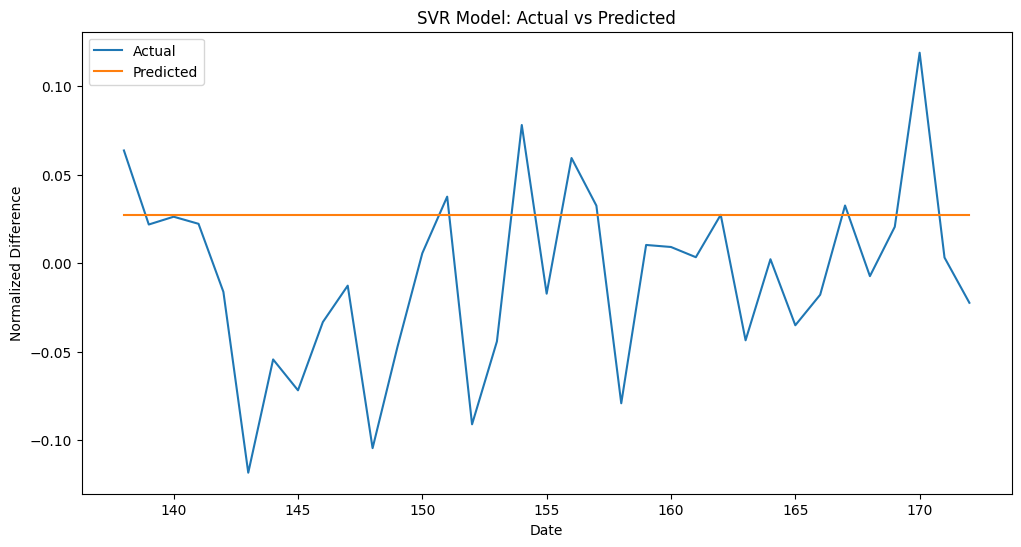

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_testSVR.index, y_testSVR.values, label='Actual')
plt.plot(y_testSVR.index, y_predSVR, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Normalized Difference')
plt.title('SVR Model: Actual vs Predicted')
plt.legend()
plt.show()


**Hybrid**

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Assuming your DataFrame is named 'monthly_data' with columns 'Close', 'High', 'Open', 'Low', and 'Date'

# Splitting data into train and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Training ARIMA model
arima_model = ARIMA(train['normalize_diff'], order=(22, 1, 22))  # Adjust the order as needed
arima_fit = arima_model.fit()

# Generating ARIMA forecasts
arima_forecast = arima_fit.forecast(steps=len(test))

# Extracting forecasted values
arima_forecast_values = arima_forecast.values

# Calculating residuals
residuals = test['normalize_diff'].values - arima_forecast_values

# Preparing data for ANN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[['High', 'Open', 'Low']].values)
y_train = train['normalize_diff'].values - arima_fit.fittedvalues

X_test = scaler.transform(test[['High', 'Open', 'Low']].values)
y_test = residuals

# Building ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training ANN model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Making predictions with the ANN
residuals_pred = model.predict(X_test).flatten()

# Calculating accuracy metrics
mse = mean_squared_error(y_test, residuals_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model:", rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model: 0.06534088326385713


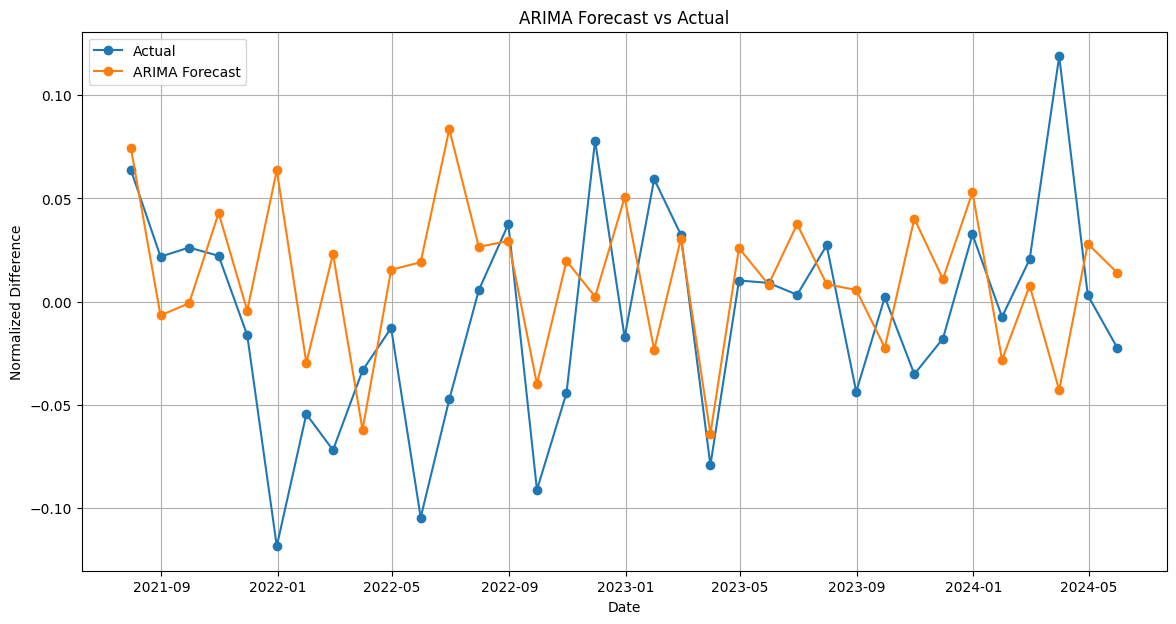

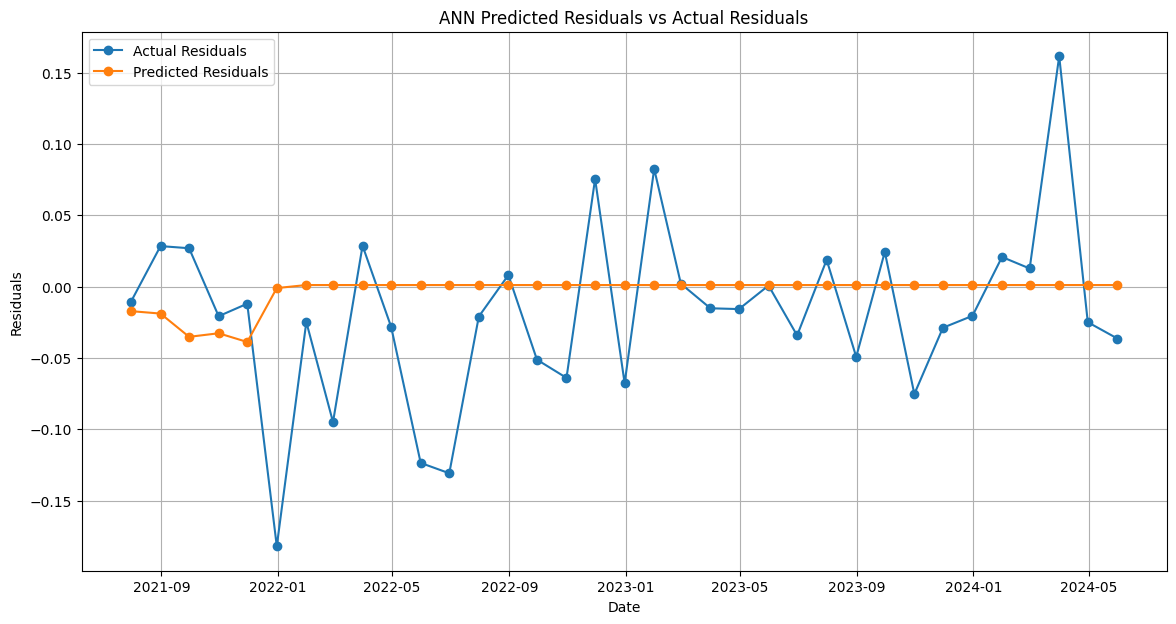

In [ ]:
import matplotlib.pyplot as plt

# Plotting the ARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(test['Date'], test['normalize_diff'], label='Actual', marker='o', linestyle='-')
plt.plot(test['Date'], arima_forecast_values, label='ARIMA Forecast', marker='o', linestyle='-')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Normalized Difference')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the ANN predicted residuals
plt.figure(figsize=(14, 7))
plt.plot(test['Date'], residuals, label='Actual Residuals', marker='o', linestyle='-')
plt.plot(test['Date'], residuals_pred, label='Predicted Residuals', marker='o', linestyle='-')
plt.title('ANN Predicted Residuals vs Actual Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


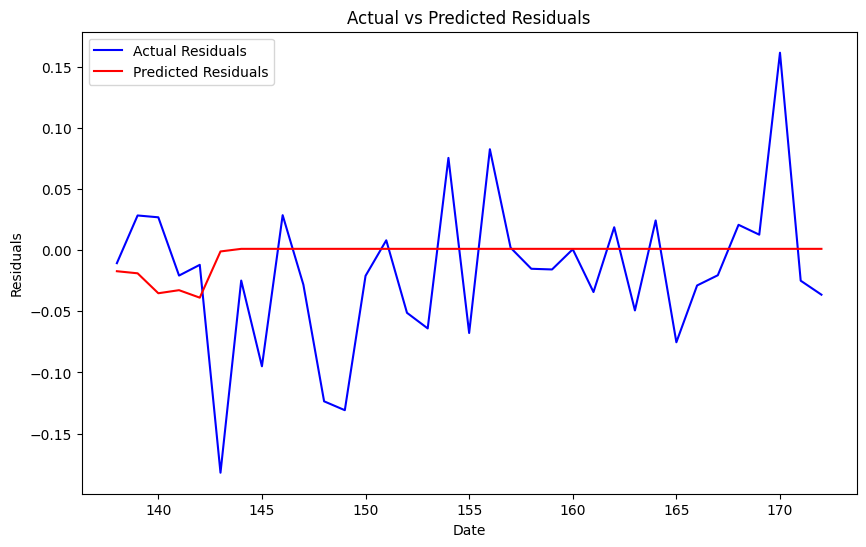

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test, label='Actual Residuals', color='blue')
plt.plot(test.index, residuals_pred, label='Predicted Residuals', color='red')
plt.title('Actual vs Predicted Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [ ]:
from keras.layers import Dropout
from keras import regularizers
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training ANN model with optimized hyperparameters
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# Making predictions with the ANN
residuals_pred = model.predict(X_test).flatten()

# Calculating accuracy metrics
mse = mean_squared_error(y_test, residuals_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model with improved ANN:", rmse)

2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model with improved ANN: 0.06606360269984451


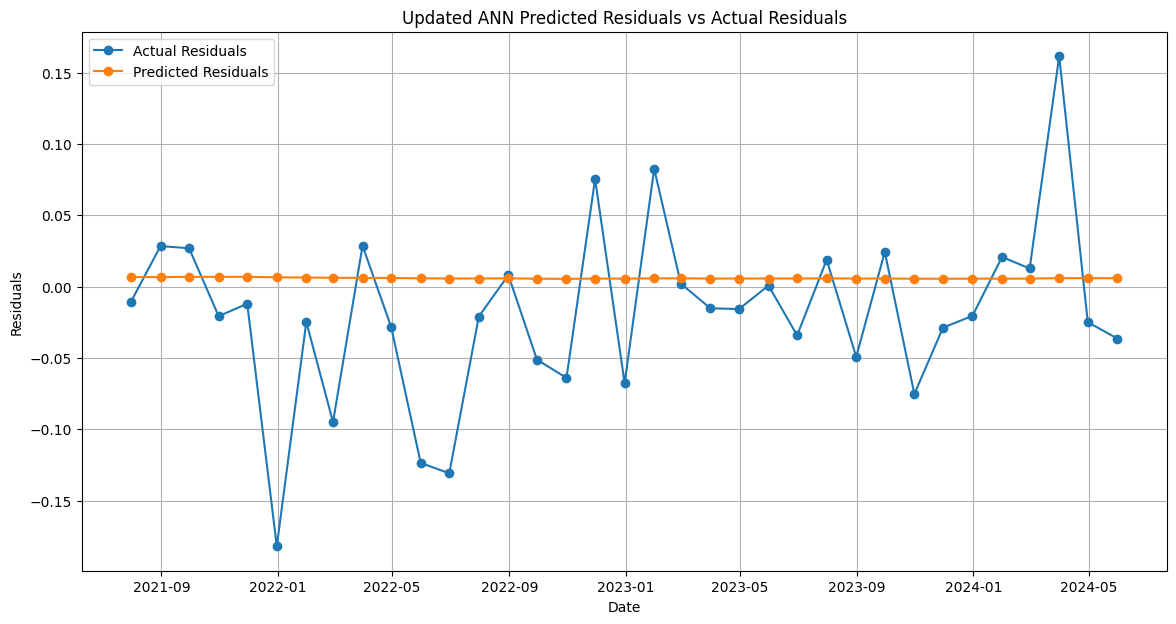

In [ ]:
# Plotting the updated ANN predicted residuals
plt.figure(figsize=(14, 7))
plt.plot(test['Date'], residuals, label='Actual Residuals', marker='o', linestyle='-')
plt.plot(test['Date'], residuals_pred, label='Predicted Residuals', marker='o', linestyle='-')
plt.title('Updated ANN Predicted Residuals vs Actual Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Assuming you have a DataFrame 'yearly_monthly_avg' with columns 'Adj Close Normalized_Diff', 'High', 'Open', 'Low', and 'Date'

# Splitting data into train and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Training ARIMA model
arima_model = ARIMA(train['normalize_diff'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Generating ARIMA forecasts
arima_forecast = arima_fit.forecast(steps=len(test))

# Extracting forecasted values
arima_forecast_values = arima_forecast.values

# Calculating residuals
residuals = test['normalize_diff'].values - arima_forecast_values

# Preparing data for ANN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[['High', 'Open', 'Low']].values)
y_train = train['normalize_diff'].values - arima_fit.fittedvalues

X_test = scaler.transform(test[['High', 'Open', 'Low']].values)
y_test = residuals

# Building ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training ANN model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Making predictions with the ANN
residuals_pred = model.predict(X_test).flatten()

# Calculating accuracy metrics
mse = mean_squared_error(y_test, residuals_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model:", rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

2/2 [==============================] - 0s 8ms/step
Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model: 0.058352418859796924


In [ ]:
import sqlite3
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()

# Create a table to store hybrid model results
cursor.execute('''CREATE TABLE IF NOT EXISTS hybrid
               (id INTEGER PRIMARY KEY,
               actual REAL,
               predicted REAL)''')
conn.commit()

# Split the data into train and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Training ARIMA model
arima_model = ARIMA(train['normalize_diff'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Generating ARIMA forecasts
arima_forecast = arima_fit.forecast(steps=len(test))

# Extracting forecasted values
arima_forecast_values = arima_forecast.values

# Calculating residuals
residuals = test['normalize_diff'].values - arima_forecast_values

# Preparing data for ANN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[['High', 'Open', 'Low']].values)
y_train = train['normalize_diff'].values - arima_fit.fittedvalues

X_test = scaler.transform(test[['High', 'Open', 'Low']].values)
y_test = residuals

# Building ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training ANN model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Making predictions with the ANN
residuals_pred = model.predict(X_test).flatten()

# Insert actual and predicted values into the SQLite database
for i in range(len(residuals)):
    cursor.execute("INSERT INTO hybrid (actual, predicted) VALUES (?, ?)", (y_test[i], residuals_pred[i]))
conn.commit()

# Close the connection
conn.close()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

2/2 [==============================] - 0s 6ms/step


In [ ]:
import sqlite3
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Assuming you have a DataFrame 'yearly_monthly_avg' with columns 'Adj Close Normalized_Diff', 'High', 'Open', 'Low', and 'Date'
# Splitting data into train and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Training ARIMA model
arima_model = ARIMA(train['normalize_diff'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Generating ARIMA forecasts
arima_forecast = arima_fit.forecast(steps=len(test))

# Extracting forecasted values
arima_forecast_values = arima_forecast.values

# Calculating residuals
residuals = test['normalize_diff'].values - arima_forecast_values

# Preparing data for ANN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[['High', 'Open', 'Low']].values)
y_train = train['normalize_diff'].values - arima_fit.fittedvalues

X_test = scaler.transform(test[['High', 'Open', 'Low']].values)
y_test = residuals

# Building ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training ANN model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Making predictions with the ANN
residuals_pred = model.predict(X_test).flatten()

# Calculating accuracy metrics
mse = mean_squared_error(y_test, residuals_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model:", rmse)

# Make predictions for the next 12 months
predictions = []
for i in range(35):
    # Prepare data for prediction
    test_data = np.array([test.iloc[i]['High'], test.iloc[i]['Open'], test.iloc[i]['Low']]).reshape(1, -1)
    test_data_scaled = scaler.transform(test_data)

    # Predict the residual with the ANN
    residual_pred = model.predict(test_data_scaled).flatten()[0]

    # Add the ARIMA forecast and ANN predicted residual to get the final prediction
    prediction = arima_forecast_values[i] + residual_pred
    predictions.append(prediction)

    # Calculate RMSE for the current month
    rmse_month = np.sqrt(mean_squared_error([test.iloc[i]['normalize_diff']], [prediction]))

    # Insert the forecasted values and RMSE into the SQLite database
    data = f"Month {i+1}"
    model_name = "Hybrid"
    cursor.execute("INSERT INTO predictions (data, model, prediction, rmse) VALUES (?, ?, ?, ?)",
                   (data, model_name, prediction, rmse_month))
    conn.commit()

    # Print the predictions and RMSE
    print(f"Month {i+1} - Prediction: {prediction}, RMSE: {rmse_month}")

# Close the connection
conn.close()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

2/2 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE) of the integrated ARIMA-ANN model: 0.06433233371115067
1/1 [==============================] - 0s 20ms/step
Month 1 - Prediction: 0.0878677498371137, RMSE: 0.02424129113720691
1/1 [==============================] - 0s 19ms/step
Month 2 - Prediction: 0.07802298869324481, RMSE: 0.056204037299541765
1/1 [==============================] - 0s 19ms/step
Month 3 - Prediction: 0.08320148830767783, RMSE: 0.05698490167605176
1/1 [==============================] - 0s 27ms/step
Month 4 - Prediction: 0.08616518325669992, RMSE: 0.06395394488191614
1/1 [==============================] - 0s 29ms/step
Month 5 - Prediction: 0.08419651051397475, RMSE: 0.10039789232071378
1/1 [==============================] - 0s 30ms/step
Month 6 - Prediction: 0.05585698693772087, RMSE: 0.17418837402054152
1/1 [==============================] - 0s 30ms/step
Month 7 - Prediction: 0.04318162010750426, RMSE: 0.09755148735066499
1/1 [===========

In [ ]:
# Forecasting future values with ARIMA
future_steps = 2
arima_forecast_future = arima_fit.forecast(steps=future_steps)

# Extracting forecasted values for the next 2 months
arima_forecast_future_values = arima_forecast_future.values

# Preparing data for ANN prediction
X_future = scaler.transform(monthly_data[['High', 'Open', 'Low']].tail(future_steps).values)

# Making predictions with the ANN for the next 2 months
residuals_pred_future = model.predict(X_future).flatten()

# Combining ARIMA and ANN forecasts
combined_forecast = arima_forecast_future_values + residuals_pred_future

# Printing the forecasted values for the next 2 months
#for i in range(future_steps):
print(combined_forecast)

# Calculating RMSE for the next 2 months
residuals_future = monthly_data['normalize_diff'].tail(future_steps).values - combined_forecast
rmse_future = np.sqrt(mean_squared_error(np.zeros(future_steps), residuals_future))

print("Root Mean Squared Error (RMSE) for the next 2 months:", rmse_future)


1/1 [==============================] - 0s 37ms/step
[0.04051867 0.02539272]
Root Mean Squared Error (RMSE) for the next 2 months: 0.04288176525547952


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


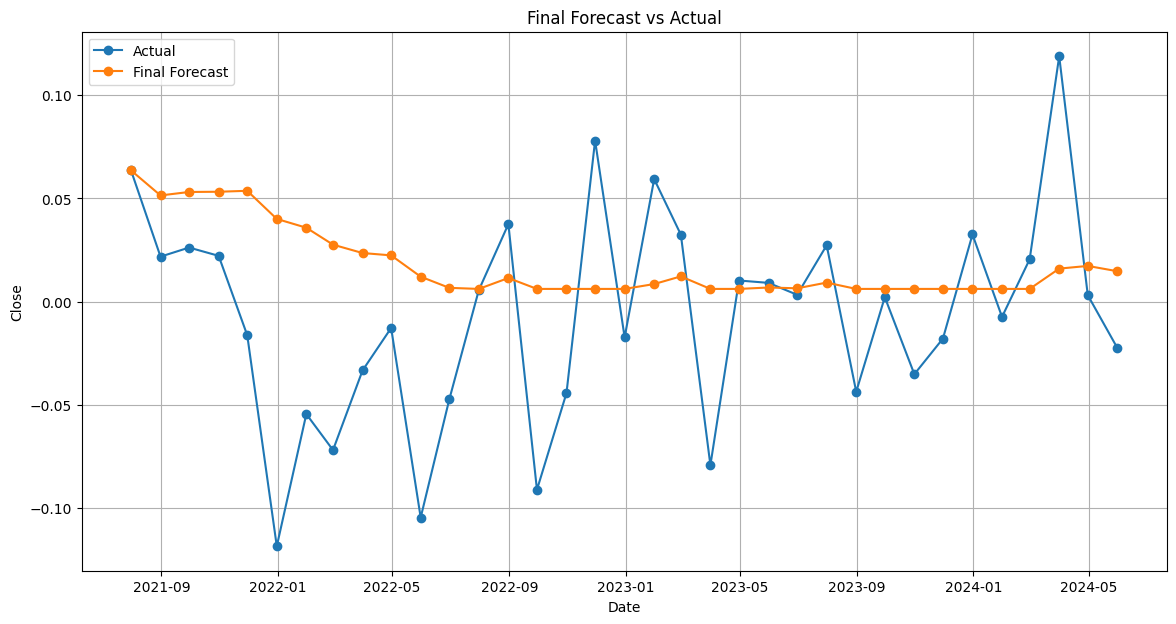

Root Mean Squared Error (RMSE) of the final forecast: 0.05819316056680427


In [ ]:
# Combining ARIMA forecast and ANN predicted residuals for final forecast
final_forecast = arima_forecast_values + residuals_pred

# Plotting the final forecast
plt.figure(figsize=(14, 7))
plt.plot(test['Date'], test['normalize_diff'], label='Actual', marker='o', linestyle='-')
plt.plot(test['Date'], final_forecast, label='Final Forecast', marker='o', linestyle='-')
plt.title('Final Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

# Calculating accuracy metrics for the final forecast
final_rmse = np.sqrt(mean_squared_error(test['normalize_diff'], final_forecast))
print("Root Mean Squared Error (RMSE) of the final forecast:", final_rmse)


**Cross Validation**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming your DataFrame is named 'monthly_data' with columns 'Close', 'High', 'Open', 'Low', and 'Date'

# Splitting data into features and target
X = monthly_data[['High', 'Open', 'Low']].values
y = monthly_data['normalize_diff'].values

# Initializing TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initializing lists to store RMSE values for each model
arima_rmse_scores = []
ann_rmse_scores = []
integrated_rmse_scores = []

# Performing cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # ARIMA model
    arima_model = ARIMA(y_train, order=(5, 1, 5))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(y_test))
    arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
    arima_rmse_scores.append(arima_rmse)

    # ANN model
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential()
    model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=0)
    ann_residuals_pred = model.predict(X_test_scaled).flatten()
    ann_rmse = np.sqrt(mean_squared_error(y_test, ann_residuals_pred))
    ann_rmse_scores.append(ann_rmse)

    # Integrated ARIMA-ANN model
    arima_forecast_values = arima_fit.forecast(steps=len(y_test))
    residuals = y_test - arima_forecast_values
    y_train_ann = y_train - arima_fit.fittedvalues

    model = Sequential()
    model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train_scaled, y_train_ann, epochs=200, batch_size=32, verbose=0)
    residuals_pred = model.predict(X_test_scaled).flatten()
    integrated_forecast = arima_forecast_values + residuals_pred
    integrated_rmse = np.sqrt(mean_squared_error(y_test, integrated_forecast))
    integrated_rmse_scores.append(integrated_rmse)

# Calculating average RMSE scores
arima_avg_rmse = np.mean(arima_rmse_scores)
ann_avg_rmse = np.mean(ann_rmse_scores)
integrated_avg_rmse = np.mean(integrated_rmse_scores)

print("Average RMSE for ARIMA model:", arima_avg_rmse)
print("Average RMSE for ANN model:", ann_avg_rmse)
print("Average RMSE for integrated ARIMA-ANN model:", integrated_avg_rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 223ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 58ms/step
Average RMSE for ARIMA model: 0.03571531521392421
Average RMSE for ANN model: 0.035976173927884485
Average RMSE for integrated ARIMA-ANN model: 0.0358376058115928


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.svm import SVR
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named 'monthly_data' with columns 'Close', 'High', 'Open', 'Low', and 'Date'

# Splitting data into features and target
X = monthly_data[['High', 'Open', 'Low']].values
y = monthly_data['normalize_diff'].values

# Initializing TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initializing lists to store RMSE values for each model
arima_rmse_scores = []
ann_rmse_scores = []
integrated_rmse_scores = []
svr_rmse_scores = []
prophet_rmse_scores = []
sarima_rmse_scores = []
lstm_rmse_scores = []
#ets_rmse_scores = []
# Performing cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # ARIMA model
    arima_model = ARIMA(y_train, order=(5, 1, 5))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(y_test))
    arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
    arima_rmse_scores.append(arima_rmse)

    # ANN model
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential()
    model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=0)
    ann_residuals_pred = model.predict(X_test_scaled).flatten()
    ann_rmse = np.sqrt(mean_squared_error(y_test, ann_residuals_pred))
    ann_rmse_scores.append(ann_rmse)

    # Integrated ARIMA-ANN model
    arima_forecast_values = arima_fit.forecast(steps=len(y_test))
    residuals = y_test - arima_forecast_values
    y_train_ann = y_train - arima_fit.fittedvalues

    model = Sequential()
    model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train_scaled, y_train_ann, epochs=200, batch_size=32, verbose=0)
    residuals_pred = model.predict(X_test_scaled).flatten()
    integrated_forecast = arima_forecast_values + residuals_pred
    integrated_rmse = np.sqrt(mean_squared_error(y_test, integrated_forecast))
    integrated_rmse_scores.append(integrated_rmse)

    # SVR model
    svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr.fit(X_train_scaled, y_train)
    svr_residuals_pred = svr.predict(X_test_scaled)
    svr_rmse = np.sqrt(mean_squared_error(y_test, svr_residuals_pred))
    svr_rmse_scores.append(svr_rmse)

    # Prophet model
    prophet_data = monthly_data[['Date', 'normalize_diff']].copy()
    prophet_data.columns = ['ds', 'y']
    model = Prophet()
    model.fit(prophet_data)
    future = model.make_future_dataframe(periods=len(y_test), freq='M')
    forecast = model.predict(future)
    forecast_test = forecast[-len(y_test):]
    prophet_rmse = np.sqrt(mean_squared_error(y_test, forecast_test['yhat']))
    prophet_rmse_scores.append(prophet_rmse)

    # SARIMA model
    sarima_model = SARIMAX(y_train, order=(2, 1, 2), seasonal_order=(0, 1, 0, 12))
    sarima_fit = sarima_model.fit()
    sarima_forecast = sarima_fit.forecast(steps=len(y_test))
    sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_forecast))
    sarima_rmse_scores.append(sarima_rmse)

    # LSTM model
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    model = Sequential()
    model.add(LSTM(units=50, input_shape=(1, X_train_scaled.shape[1])))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_lstm, y_train, epochs=100, batch_size=1, verbose=0)

    lstm_residuals_pred = model.predict(X_test_lstm).flatten()
    lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_residuals_pred))
    lstm_rmse_scores.append(lstm_rmse)




# Calculating average RMSE scores
arima_avg_rmse = np.mean(arima_rmse_scores)
ann_avg_rmse = np.mean(ann_rmse_scores)
integrated_avg_rmse = np.mean(integrated_rmse_scores)
svr_avg_rmse = np.mean(svr_rmse_scores)
prophet_avg_rmse = np.mean(prophet_rmse_scores)
sarima_avg_rmse = np.mean(sarima_rmse_scores)
lstm_avg_rmse = np.mean(lstm_rmse_scores)
#ets_avg_rmse = np.mean(ets_rmse_scores)
print("Average RMSE for ARIMA model:", arima_avg_rmse)
print("Average RMSE for ANN model:", ann_avg_rmse)
print("Average RMSE for integrated ARIMA-ANN model:", integrated_avg_rmse)
print("Average RMSE for SVR model:", svr_avg_rmse)
print("Average RMSE for Prophet model:", prophet_avg_rmse)
print("Average RMSE for SARIMA model:", sarima_avg_rmse)
print("Average RMSE for LSTM model:", lstm_avg_rmse)
#print("Average RMSE for ETS model:", ets_avg_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 84ms/step


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/o3ww237j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/fj6eq0ka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75605', 'data', 'file=/tmp/tmpus192hk7/o3ww237j.json', 'init=/tmp/tmpus192hk7/fj6eq0ka.json', 'output', 'file=/tmp/tmpus192hk7/prophet_modeljoin1nil/prophet_model-20240515081223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:12:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1/1 [==============================] - 1s 911ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 66ms/step


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/d3w6ho8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/7g80jtjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26244', 'data', 'file=/tmp/tmpus192hk7/d3w6ho8a.json', 'init=/tmp/tmpus192hk7/7g80jtjs.json', 'output', 'file=/tmp/tmpus192hk7/prophet_modelc4zkkapl/prophet_model-20240515081242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:12:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:12:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

1/1 [==============================] - 0s 438ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 100ms/step


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/7m8805to.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/lbsme7in.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29014', 'data', 'file=/tmp/tmpus192hk7/7m8805to.json', 'init=/tmp/tmpus192hk7/lbsme7in.json', 'output', 'file=/tmp/tmpus192hk7/prophet_modelta7q_7xm/prophet_model-20240515081313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:13:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:13:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

1/1 [==============================] - 0s 408ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 67ms/step


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/7058_ykz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/wmwhu91e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95486', 'data', 'file=/tmp/tmpus192hk7/7058_ykz.json', 'init=/tmp/tmpus192hk7/wmwhu91e.json', 'output', 'file=/tmp/tmpus192hk7/prophet_modelewuf8a8f/prophet_model-20240515081345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:13:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:13:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1/1 [==============================] - 0s 406ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 [==============================] - 0s 377ms/step


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/3ztfogam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpus192hk7/ruvvvjgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85733', 'data', 'file=/tmp/tmpus192hk7/3ztfogam.json', 'init=/tmp/tmpus192hk7/ruvvvjgk.json', 'output', 'file=/tmp/tmpus192hk7/prophet_model1qcpbwwq/prophet_model-20240515081423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1/1 [==============================] - 0s 411ms/step
Average RMSE for ARIMA model: 0.03571531521392421
Average RMSE for ANN model: 0.03776769515933075
Average RMSE for integrated ARIMA-ANN model: 0.03598322992084396
Average RMSE for SVR model: 0.03868147556014895
Average RMSE for Prophet model: 0.03737829695571866
Average RMSE for SARIMA model: 0.05066754108557857
Average RMSE for LSTM model: 0.038785046223220765


In [ ]:
# Find the minimum and maximum values of the target variable
min_target = monthly_data['normalize_diff'].min()
max_target = monthly_data['normalize_diff'].max()

# Calculate the range
target_range = max_target - min_target


In [ ]:
target_range

0.6402784913061211

In [ ]:
print("Average RMSE for LSTM model:", lstm_avg_rmse)

Average RMSE for LSTM model: 0.03852719993163696


In [ ]:
# Calculate the range of the target variable (assuming it's between 0 and 1)
target_range = 1

# Calculate accuracy for each model
arima_accuracy = 100 * (1 - (arima_avg_rmse / target_range))
ann_accuracy = 100 * (1 - (ann_avg_rmse / target_range))
integrated_accuracy = 100 * (1 - (integrated_avg_rmse / target_range))
svr_accuracy = 100 * (1 - (svr_avg_rmse / target_range))
prophet_accuracy = 100 * (1 - (prophet_avg_rmse / target_range))
sarima_accuracy = 100 * (1 - (sarima_avg_rmse / target_range))
lstm_accuracy = 100 * (1 - (lstm_avg_rmse / target_range))

# Print the accuracies
print("Accuracy for ARIMA model:", arima_accuracy)
print("Accuracy for ANN model:", ann_accuracy)
print("Accuracy for integrated ARIMA-ANN model:", integrated_accuracy)
print("Accuracy for SVR model:", svr_accuracy)
print("Accuracy for Prophet model:", prophet_accuracy)
print("Accuracy for SARIMA model:", sarima_accuracy)
print("Accuracy for LSTM model:", lstm_accuracy)

Accuracy for ARIMA model: 96.42846847860757
Accuracy for ANN model: 96.22323048406692
Accuracy for integrated ARIMA-ANN model: 96.4016770079156
Accuracy for SVR model: 96.1318524439851
Accuracy for Prophet model: 96.26217030442812
Accuracy for SARIMA model: 94.93324589144214
Accuracy for LSTM model: 96.12149537767792


In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('RMSE.db')
cursor = conn.cursor()

# Create the table if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS RMSE
             (name TEXT, rmse REAL)''')

# Define the data to insert
data = [
    ('ARIMA', arima_avg_rmse),
    ('ANN', ann_avg_rmse),
    ('Integrated ARIMA-ANN', integrated_avg_rmse),
    ('SVR', svr_avg_rmse),
    ('Prophet', prophet_avg_rmse),
    ('SARIMA', sarima_avg_rmse),
    ('LSTM', lstm_avg_rmse)
    # Add more models if needed
]

# Insert the data into the table
cursor.executemany('INSERT INTO RMSE (name, rmse) VALUES (?, ?)', data)
conn.commit()

# Close the connection
conn.close()


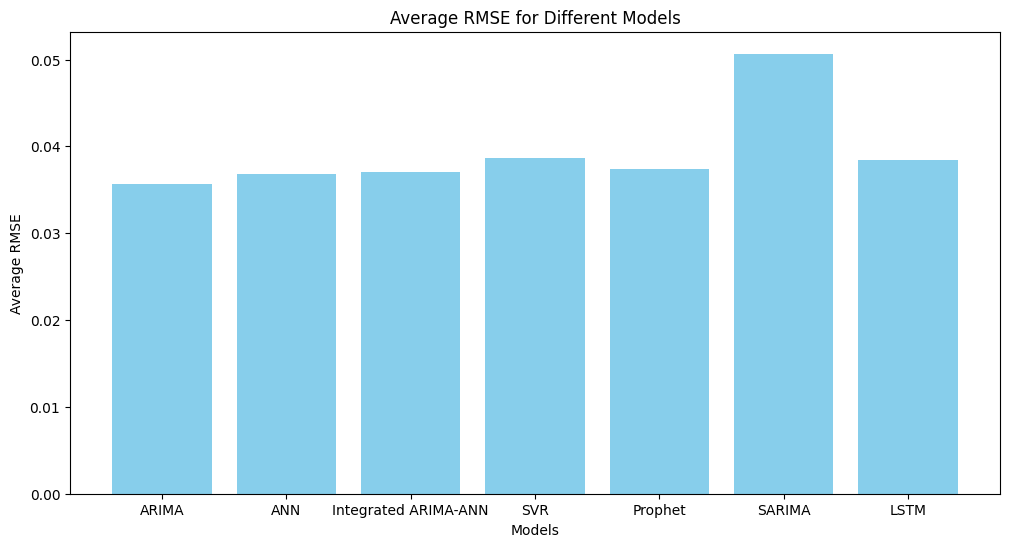

In [ ]:
import matplotlib.pyplot as plt

# List of model names
models = ['ARIMA', 'ANN', 'Integrated ARIMA-ANN', 'SVR', 'Prophet', 'SARIMA', 'LSTM']#, 'ETS']

# List of RMSE scores for each model (replace with actual RMSE scores)
rmse_scores = [arima_avg_rmse, ann_avg_rmse, integrated_avg_rmse, svr_avg_rmse, prophet_avg_rmse, sarima_avg_rmse, lstm_avg_rmse]#, ets_avg_rmse]

# Plotting the RMSE scores
plt.figure(figsize=(12, 6))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Average RMSE')
plt.title('Average RMSE for Different Models')
plt.show()


In [ ]:
import sqlite3

# Connect to the SQLite database (create it if it doesn't exist)
conn = sqlite3.connect('dummy.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS forecasting_results
             (id INTEGER PRIMARY KEY, model TEXT, dataset TEXT, rmse REAL)''')

# Sample data for insertion (replace this with your actual data)
data = [
    ('ARIMA', 'Electric_Production', 0.123),
    ('ANN', 'Electric_Production', 0.234),
    ('Hybrid (ARIMA-ANN)', 'Electric_Production', 0.345),
    # Add more rows as needed
]

In [ ]:
cursor.executemany('INSERT INTO forecasting_results (model, dataset, rmse) VALUES (?, ?, ?)', data)

# Commit the changes to the database
conn.commit()

# Close the connection
conn.close()

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('predictions_new.db')
cursor = conn.cursor()

# Prepare the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(monthly_data['normalize_diff']).reshape(-1, 1))

# Split the data into training and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for LSTM input (samples, timesteps, features)
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))

# Train the LSTM model
model.fit(X_train, train, epochs=100, batch_size=1, verbose=1)

# Make predictions for the next 35 months
predictions = []
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))
for i in range(35):
    # Predict the next month
    X_test_next_month = X_test[i].reshape(1, 1, 1)
    prediction_next_month = model.predict(X_test_next_month)
    predictions.append(prediction_next_month[0][0])

    # Update X_test for the next prediction
    X_test = np.concatenate((X_test, prediction_next_month.reshape(1, 1, 1)), axis=0)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Update the SQLite database with the new predictions
for i in range(35):
    # Calculate RMSE for the current month
    actual_month = monthly_data.iloc[-35 + i]['normalize_diff']
    rmse = np.sqrt(mean_squared_error([actual_month], [predictions[i]]))

    # Update the record in the SQLite database
    data = f"Month {i+1}"
    model_name = "LSTM"
    prediction = predictions[i][0]
    cursor.execute("UPDATE predictions SET prediction = ?, rmse = ? WHERE data = ? AND model = ?",
                   (prediction, rmse, data, model_name))
    conn.commit()

    # Print the predictions and RMSE
    print(f"Month {i+1} - Prediction: {prediction}, RMSE: {rmse}")

# Close the connection
conn.close()


Epoch 1/100
136/136 [==============================] - 3s 4ms/step - loss: 0.0901
Epoch 2/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 3/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 4/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 5/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 8/100
136/136 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 9/100
136/136 [==============================] - 0s 3ms/step - loss: 9.6607e-04
Epoch 10/100
136/136 [==============================] - 0s 3ms/step - loss: 6.3142e-04
Epoch 11/100
136/136 [==============================] - 0s 3ms/step - loss: 3.4148e-04
Epoch 12/100
136/136 [==============================] - 1s 4ms/step - loss: 1.7418e-

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SELECT query to retrieve the data
#cursor.execute('SELECT * FROM ann')
cursor.execute('SELECT * FROM arima')
#cursor.execute('SELECT * FROM prophet')
#cursor.execute('SELECT * FROM sarima')
#cursor.execute('SELECT * FROM lstm
# Fetch all the rows from the result set
rows = cursor.fetchall()
count = 0
# Print the data
for row in rows:
    print(row)
    count += 1
# Close the connection
conn.close()
print (count)

(0.0636264586999068, 0.07418998434171337)
(0.021818951393703045, -0.00663322935232101)
(0.02621658663162607, -0.0007332125525865152)
(0.02221123837478378, 0.042917266204740886)
(-0.016201381806739024, -0.004270089071389378)
(-0.11833138708282065, 0.06365601590023529)
(-0.05436986724316073, -0.0295966541523498)
(-0.07180136792506431, 0.023133563354796195)
(-0.03326658982497521, -0.06197341852699132)
(-0.012704776981472876, 0.01545284487060005)
(-0.10445535789480731, 0.01912530375187469)
(-0.04731580480191189, 0.08351867400360716)
(0.00562082788531626, 0.0265592801705075)
(0.037550827289777544, 0.029412296694376224)
(-0.09099847300921216, -0.03981293349705285)
(-0.044192126754800276, 0.019752879384217936)
(0.07799838676479615, 0.0024562738529167877)
(-0.01723061506007484, 0.05045929584261618)
(0.05935491886690325, -0.02326839597212208)
(0.03246212024403605, 0.030384921689715474)
(-0.07912079601414512, -0.06396776780820752)
(0.010269949726600336, 0.025981183595557997)
(0.00912478629967572

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SELECT query to retrieve the data
cursor.execute('SELECT * FROM ann')
#cursor.execute('SELECT * FROM arima')
######cursor.execute("DROP TABLE IF EXISTS prophet")
#cursor.execute('SELECT * FROM prophet')
#cursor.execute('SELECT * FROM sarima')
#cursor.execute('SELECT * FROM LSTM')
#cursor.execute('SELECT * FROM hybrid')
#cursor.execute('SELECT * FROM ETS')
# Fetch all the rows from the result set
rows = cursor.fetchall()

# Print the data
for row in rows:
    print(row)

# Close the connection
conn.close()


(1, 0.0636264586999068, b'\xb1P\x82=')
(2, 0.021818951393703045, b'\xa2Z\xb2<')
(3, 0.02621658663162607, b'tl\xd6<')
(4, 0.02221123837478378, b'R\x92\xb5<')
(5, -0.016201381806739024, b'|}\x85\xbc')
(6, -0.11833138708282065, b'\x85u\xb5\xbd')
(7, -0.05436986724316073, b'\x9d_c\xbd')
(8, -0.07180136792506431, b':M\x88\xbd')
(9, -0.03326658982497521, b'dL\x08\xbd')
(10, -0.012704776981472876, b')\x9fQ\xbc')
(11, -0.10445535789480731, b'\xfb\\\xa2\xbd')
(12, -0.04731580480191189, b'\x98\xd7?\xbd')
(13, 0.00562082788531626, b'b\xfc\xb5;')
(14, 0.037550827289777544, b'\x9c\xb1\x19=')
(15, -0.09099847300921216, b'\x8bY\x92\xbd')
(16, -0.044192126754800276, b'\xbf<4\xbd')
(17, 0.07799838676479615, b'S\xb0\x9f=')
(18, -0.01723061506007484, b'\x93\xee\x8d\xbc')
(19, 0.05935491886690325, b'\xe1\x1cs=')
(20, 0.03246212024403605, b'-\xd3\x04=')
(21, -0.07912079601414512, b'\xca\xb4\x8b\xbd')
(22, 0.010269949726600336, b"\xdfA'<")
(23, 0.009124786299675725, b'\xd1x\x14<')
(24, 0.003356285046409946,

In [ ]:
conn = sqlite3.connect('MODELS.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

cursor.execute('SELECT * FROM LSTM')
rows = cursor.fetchall()
for row in rows:
    model_id, binary_data,rmse = row
    print(f"Model ID: {model_id}, RMSE: {rmse}")


Model ID: 1, RMSE: b'\xa5\xd7\x81='
Model ID: 2, RMSE: b' 1\xb1<'
Model ID: 3, RMSE: b'\xd2;\xd5<'
Model ID: 4, RMSE: b'Bh\xb4<'
Model ID: 5, RMSE: b'/r\x86\xbc'
Model ID: 6, RMSE: b'\xe1\xec\xf0\xbd'
Model ID: 7, RMSE: b'O<_\xbd'
Model ID: 8, RMSE: b'+\x15\x93\xbd'
Model ID: 9, RMSE: b'!\x11\t\xbd'
Model ID: 10, RMSE: b'\xd3\x99S\xbc'
Model ID: 11, RMSE: b'O\x17\xd5\xbd'
Model ID: 12, RMSE: b'\xb5vB\xbd'
Model ID: 13, RMSE: b'\xdc\x9c\xb1;'
Model ID: 14, RMSE: b'X\x0b\x19='
Model ID: 15, RMSE: b'{\xf7\xb9\xbd'
Model ID: 16, RMSE: b'T\xb65\xbd'
Model ID: 17, RMSE: b"\xe2'\x9f="
Model ID: 18, RMSE: b'l\xe0\x8e\xbc'
Model ID: 19, RMSE: b'\x97<r='
Model ID: 20, RMSE: b'04\x04='
Model ID: 21, RMSE: b'\x9d\xee\xa1\xbd'
Model ID: 22, RMSE: b'0\t%<'
Model ID: 23, RMSE: b'LB\x12<'
Model ID: 24, RMSE: b'K\xb4N;'
Model ID: 25, RMSE: b'e.\xde<'
Model ID: 26, RMSE: b'\xb9!3\xbd'
Model ID: 27, RMSE: b'\xecO\x03;'
Model ID: 28, RMSE: b'\x08u\x10\xbd'
Model ID: 29, RMSE: b'\xf3\xda\x93\xbc'
Model ID:

In [ ]:
binary_data = b'\xa5\xd7\x81='
decoded_data = binary_data.decode('utf-8')
print(decoded_data)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 0: invalid start byte

In [ ]:
binary_data = b'\xa5\xd7\x81='
try:
    decoded_data = binary_data.decode('utf-8')
except UnicodeDecodeError:
    print("Decoding with UTF-8 failed.")
try:
    decoded_data = binary_data.decode('latin-1')
    print("Decoded with Latin-1:", decoded_data)
except UnicodeDecodeError:
    print("Decoding with Latin-1 failed.")
try:
    decoded_data = binary_data.decode('cp1252')
    print("Decoded with cp1252:", decoded_data)
except UnicodeDecodeError:
    print("Decoding with cp1252 failed.")


Decoding with UTF-8 failed.
Decoded with Latin-1: ¥×=
Decoding with cp1252 failed.


In [ ]:
from google.colab import files

# Provide the path to the SQLite database file
db_file_path = 'RMSE.db'

# Download the file
files.download(db_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('MODELS.db')
cursor = conn.cursor()


In [ ]:
cursor.execute('SHOW TABLES')

OperationalError: near "SHOW": syntax error